In [8]:
pip install pyswarms

Note: you may need to restart the kernel to use updated packages.


In [9]:
import sys
sys.path.append(str('/home/jupyter/'))
import pandas as pd
from configparser import ConfigParser
from repo.MyConfigParser import MyConfigParser
from repo.Optimization import SavantPSO
import numpy as np
import pandas as pd

# Read In

In [10]:
updated_config = ConfigParser()
config_in_path = "/home/jupyter/US/Jun 2024/config ups us device.ini"
updated_config.read(config_in_path)

getdict = MyConfigParser()
config_dict=getdict.GetDict(updated_config)
region = config_dict['CLIENTINFO']['country']
cutoff_month = config_dict['PROPHETSETTING']['cut_off_point']
base_start = config_dict['PROPHETSETTING']['reference_start_date1']
base_end = config_dict['PROPHETSETTING']['reference_end_date1']
periods = config_dict['PROPHETSETTING']['periods']
base_periods  = config_dict['PROPHETSETTING']['base_periods']

output_bucket = config_dict["FILEPATH"]["output_bucket"]
folder_name = config_dict["FILEPATH"]["folder_name"]

base_path = config_dict["FILEPATH"]["base_path"]

boundary_df_in_path = base_path + config_dict["FILEPATH"]["boundary_df_in_path"]
daily_df_out_path = base_path + config_dict["FILEPATH"]["daily_df_out_path"]
analytical_file_path = base_path + config_dict["FILEPATH"]["analytical_file_path"]
cuts_df_in_path = base_path + config_dict["FILEPATH"]["cuts_df_in_path"]
plot_name = base_path + config_dict["FILEPATH"]["plot_name"]
constraint_file_name = base_path + config_dict["FILEPATH"]["constraint_file_name"]
breakdown_ls = [config_dict['CLIENTINFO'][i] for i in [f'breakdown{i}' for i in range(1,5)] if config_dict['CLIENTINFO'][i] != None]

small_market_str = ''
pre_forecast_period_budget = float(config_dict['CLIENTINFO']['pre_forecast_period_budget'])
client_budget = float(config_dict['CLIENTINFO']['client_budget'])

save_date = config_dict['CLIENTINFO']['save_date']

In [11]:
# Get forecasters
bdDf = pd.read_csv('US Breakdown Jun final.csv').drop('Unnamed: 0', axis = 1)

cuts_df = bdDf.reset_index(drop = True)
cuts_df['forecaster_name_list'] =  cuts_df['market'] + ' ' + cuts_df['account_type'] + ' ' + cuts_df['funnel'] + '.pkl' #' 05.19.2021 Final.pkl'
cuts_df['periods'] = periods
# get model list
forecasters_array = cuts_df.forecaster_name_list

# Get analytical file
analytical_file = pd.read_csv(analytical_file_path).drop('Unnamed: 0', axis = 1)
analytical_file['ds'] = pd.to_datetime(analytical_file['ds'])
analytical_file_check_version = analytical_file.copy()

# Get constrain file
constraint_file = pd.read_csv(constraint_file_name)
constraint_file['init'] = constraint_file[['MinWeight', 'MaxWeight']].mean(axis = 1)
cuts_df

,market,account_type,funnel,periods_for_acc_cal,changepoint_prior_scale,seasonality_prior_scale,holidays_prior_scale,seasonality_mode,input_mode,weekday_or_weekend,...,covid_year_dummy,anomaly_2021,generic_cost_split,competitor_cost_split,new_confirmed,power,growth,periods,cutoff_month,forecaster_name_list
0,US,Desktop,-,183,0.05,0.1,1.0,multiplicative,multiplicative,na,...,na,na,na,na,na,na,logistic,251.0,2024-04-25,US Desktop -.pkl
1,US,Mobile & Tablet,-,183,0.10,10.0,1.0,multiplicative,multiplicative,multiplicative,...,na,na,na,na,na,na,linear,251.0,2024-04-25,US Mobile & Tablet -.pkl


# Functions

In [12]:
resultPSO = SavantPSO(cuts_df, analytical_file, constraint_file, config_dict)

In [13]:
before,after=resultPSO._get_before_after_variable()

In [14]:
itNum = 150
options = {'c1': 0.20255337412386598,
 'c2': 0.034812002156869526,
 'w': 0.8707709059066462}
result = resultPSO.run_pso(options, itNum = itNum)

2024-05-30 04:38:26,741 - pyswarms.single.global_best - INFO - Optimize for 150 iters with {'c1': 0.20255337412386598, 'c2': 0.034812002156869526, 'w': 0.8707709059066462}


/home/jupyter/US/Jun 2024/Input Weight History 05.30.2024.csv


pyswarms.single.global_best:   0%|          |0/150

[1.   1.   1.   1.   1.   1.   1.   0.75 1.   1.   1.   1.   1.   1.
 1.   1.   0.75 1.  ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3400000001
yhat: -5923523.0
client_budget - analytical_spend_latest_period: 0
[1.   1.   1.   1.   1.   1.   1.   0.75 1.   1.   1.   1.   1.   1.
 1.   1.   0.75 1.  ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3400000001
yhat: -5923523.0
client_budget - analytical_spend_latest_period: 0
[1.   1.   1.   1.   1.   1.   1.   0.75 1.   1.   1.   1.   1.   1.
 1.   1.   0.75 1.  ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X ne

pyswarms.single.global_best:   1%|          |1/150, best_cost=-5.92e+6

yhat: -5923523.0
client_budget - analytical_spend_latest_period: 0
[1.03939773 0.88199698 0.9951878  0.9207829  1.10463821 1.05668755
 1.18475487 0.78171274 1.12347723 0.90377586 1.01121646 0.96132332
 1.1273366  0.97113231 0.89248954 0.90536588 0.74685816 0.94987355]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3399999999
yhat: -5926499.0
client_budget - analytical_spend_latest_period: 0
[0.86094821 1.17263916 1.04357082 1.16052721 1.12041003 0.91210042
 0.90443676 0.76677279 1.05184918 1.04059651 1.14529393 0.88523641
 0.883241   0.95208787 1.08640963 1.18811044 0.71097573 0.85299441]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period per

pyswarms.single.global_best:   1%|▏         |2/150, best_cost=-5.94e+6

yhat: -5941185.0
client_budget - analytical_spend_latest_period: 0
[1.07467372 1.07720808 0.88710056 0.80401445 1.19549213 1.00252131
 0.94461173 0.70577394 0.82893522 1.17044387 0.96950295 0.87533423
 1.18621044 0.84239029 1.09617047 1.12055732 0.77878973 0.85564107]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3399999999
yhat: -5922429.0
client_budget - analytical_spend_latest_period: 0
[1.09626034 0.91630059 1.02845466 0.84819425 1.17244472 1.18817902
 1.12578778 0.71678013 0.98873508 0.9721813  0.8688944  1.13367798
 1.13500469 0.80596501 1.16115627 0.94921978 0.71234314 1.02489888]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period per

pyswarms.single.global_best:   2%|▏         |3/150, best_cost=-5.95e+6

yhat: -5914369.0
client_budget - analytical_spend_latest_period: 0
[1.10469943 1.17853255 1.09621167 1.05343334 0.8596215  0.85294002
 1.11235812 0.74646578 0.96614398 0.96720507 0.89004517 1.16174857
 1.18210862 1.04248666 1.18637811 0.82135097 0.74746369 1.12361785]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5940642.0
client_budget - analytical_spend_latest_period: 0
[0.901711   1.03969119 0.96360627 0.8726289  1.16530597 1.02556486
 0.86818775 0.70890247 0.82449861 0.81454068 0.98305843 0.95021196
 0.9524416  0.97532258 0.8251366  1.09323739 0.76228663 1.12201744]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spen

pyswarms.single.global_best:   3%|▎         |4/150, best_cost=-5.95e+6

yhat: -5929436.0
client_budget - analytical_spend_latest_period: 0
[1.12972848 0.81506062 0.8282366  0.86802404 0.91746004 1.01930318
 0.85948514 0.70310552 1.08447932 1.13437878 1.16863319 1.00944281
 1.12108905 1.15868884 0.81335824 0.86038948 0.76902448 0.9552146 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5903952.0
client_budget - analytical_spend_latest_period: 0
[1.09088971 1.14265467 0.86347005 0.83952952 1.10793561 0.85167895
 0.96200291 0.75123194 0.98313796 0.98901381 1.06832017 1.14537583
 1.14297369 1.06032791 0.93750252 0.81452636 0.75886159 1.15224345]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spe

pyswarms.single.global_best:   3%|▎         |5/150, best_cost=-5.95e+6

yhat: -5925836.0
client_budget - analytical_spend_latest_period: 0
[1.1478335  0.87458416 0.9554812  1.06030061 0.96267266 1.10024484
 1.00774738 0.79117122 1.17510515 0.86841737 0.95839763 0.84952991
 1.01708053 1.1867008  0.80206582 0.83683461 0.74735302 1.16490881]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3400000002
yhat: -5913944.0
client_budget - analytical_spend_latest_period: 0
[0.8554547  0.83033812 1.1569468  1.16283577 1.00851727 1.06046335
 1.0280117  0.74514922 1.06909942 1.08593732 1.11569861 0.90980454
 0.90346294 1.03601027 1.07510156 0.93871996 0.71292716 1.10194432]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period per

pyswarms.single.global_best:   4%|▍         |6/150, best_cost=-5.95e+6

yhat: -5900790.0
client_budget - analytical_spend_latest_period: 0
[1.15784411 0.90777916 1.04105289 0.8268799  0.99992447 1.07393003
 1.14856078 0.71525779 0.83214338 0.98897809 1.11296519 1.07172555
 0.88284124 1.13137208 1.14929664 1.16509166 0.79016128 0.94317882]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 651342.3400000001
yhat: -5935492.0
client_budget - analytical_spend_latest_period: 0
[0.99921615 0.91156207 1.01311994 1.0425979  0.87367251 0.84117193
 1.03488138 0.70095848 1.09146485 1.11486849 1.15276353 1.05463316
 1.0436723  0.96164979 1.19661575 1.04698634 0.7355991  1.00574181]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period pe

pyswarms.single.global_best:   5%|▍         |7/150, best_cost=-5.95e+6

yhat: -5929101.0
client_budget - analytical_spend_latest_period: 0
[1.1648457  0.92011302 1.06994086 1.00740247 1.01459842 0.97905031
 0.86653743 0.78532464 0.89864273 1.09009183 0.80939673 0.87349066
 1.12571639 1.01572302 1.05705408 1.00312084 0.7950659  1.10829886]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3400000001
yhat: -5923264.0
client_budget - analytical_spend_latest_period: 0
[1.12632921 0.98676827 0.83936737 0.88459293 1.1097491  0.99882006
 0.9894717  0.72373211 1.05445864 1.08836635 1.18128478 1.17838973
 1.16537275 0.84369067 0.90236188 1.14038101 0.72988331 0.87018392]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period per

pyswarms.single.global_best:   5%|▌         |8/150, best_cost=-5.95e+6

yhat: -5930767.0
client_budget - analytical_spend_latest_period: 0
[1.16163277 0.89696789 1.04613477 1.16721372 1.02983069 0.83093505
 0.98840831 0.7993438  0.96745869 1.15827677 0.90460152 1.09178321
 0.93708018 0.86410904 0.95384392 1.19662788 0.77200541 0.85148972]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5938299.0
client_budget - analytical_spend_latest_period: 0
[0.81883743 1.04019    1.06161006 1.11308637 0.87135492 1.12932579
 0.9027189  0.71690928 0.96799529 1.01134784 1.19916371 0.86536207
 0.84755345 1.10822611 1.01195836 0.81751081 0.70001186 1.11620563]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spe

pyswarms.single.global_best:   6%|▌         |9/150, best_cost=-5.95e+6

yhat: -5928116.0
client_budget - analytical_spend_latest_period: 0
[1.15408031 0.85351136 0.97832336 0.89916705 1.0444382  1.05480072
 1.10037767 0.7691442  1.02539028 1.17636105 0.98506587 0.8888599
 1.15963153 1.08891728 0.85879162 0.96198476 0.72389292 1.01686423]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3400000001
yhat: -5925022.0
client_budget - analytical_spend_latest_period: 0
[0.93949117 1.08472216 0.84696254 0.8966706  1.02055867 0.82979087
 1.18336705 0.7841627  0.85739607 0.90531287 0.8088242  0.95483368
 0.93597332 0.92802626 1.13967319 0.92828644 0.75368055 0.91989871]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period peri

pyswarms.single.global_best:   7%|▋         |10/150, best_cost=-5.95e+6

yhat: -5916563.0
client_budget - analytical_spend_latest_period: 0
[1.13709778 1.19656257 0.88369293 1.03923466 1.04018153 0.81235213
 1.19876996 0.79951721 1.07085456 1.17719464 1.03176301 1.09104349
 0.95002909 0.87852465 1.18216433 1.08299814 0.76177678 1.16864308]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3400000001
yhat: -5937123.0
client_budget - analytical_spend_latest_period: 0
[1.04574314 1.12511991 1.01710701 1.05748025 1.15218231 0.9176425
 1.02703394 0.72909702 1.10977397 1.15952621 0.81826311 1.03283138
 1.01239289 1.11824514 0.85128785 1.02492716 0.78786677 1.09948139]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period peri

pyswarms.single.global_best:   7%|▋         |11/150, best_cost=-5.95e+6

yhat: -5913196.0
client_budget - analytical_spend_latest_period: 0
[1.11775818 1.09190184 1.1772208  1.16070928 1.01704562 0.95828581
 0.86668766 0.79970911 1.09533387 1.13416479 1.05828427 0.87305594
 1.13057671 1.07051987 1.06401163 1.13778195 0.78145303 0.88673565]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5921290.0
client_budget - analytical_spend_latest_period: 0
[1.13739315 1.15748658 1.15468818 1.17303184 0.84618692 0.98944422
 0.86332068 0.75800585 0.89550676 0.95760626 0.82637599 1.09312485
 1.07346709 0.88277018 1.00689978 1.09954312 0.79932562 0.82817127]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spen

pyswarms.single.global_best:   8%|▊         |12/150, best_cost=-5.95e+6

yhat: -5928878.0
client_budget - analytical_spend_latest_period: 0
[1.09764681 0.95415256 1.02918527 0.84816435 0.98154216 1.07180925
 0.97685037 0.76602313 1.09149048 1.083551   1.06660202 1.084688
 0.89070921 0.82775044 0.93560896 1.15425476 0.78371011 0.99871193]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5912553.0
client_budget - analytical_spend_latest_period: 0
[1.17653804 1.18473768 0.85442222 0.83960488 0.96445244 1.0180944
 1.10005054 0.77211842 1.05558103 1.12164149 0.83100762 1.12918958
 1.10764143 1.03068868 1.15748271 1.13051019 0.7870467  0.94582593]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend 

pyswarms.single.global_best:   9%|▊         |13/150, best_cost=-5.95e+6

yhat: -5926057.0
client_budget - analytical_spend_latest_period: 0
[1.08095712 0.81673384 0.86254038 0.9396254  0.94967193 1.14228862
 1.08880044 0.70656227 1.08317972 1.01241448 1.04696885 0.87807315
 1.07867204 0.99537654 1.17969626 1.13691578 0.7659866  1.11697483]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5915741.0
client_budget - analytical_spend_latest_period: 0
[0.80006339 1.19437923 0.94963269 0.90236896 1.0748621  1.0341388
 0.91867005 0.77126784 1.18906178 0.83627178 0.83511046 1.12948262
 1.10872736 1.1464687  0.88528636 1.11941037 0.76083538 1.04634871]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend

pyswarms.single.global_best:   9%|▉         |14/150, best_cost=-5.95e+6

yhat: -5934526.0
client_budget - analytical_spend_latest_period: 0
[1.06873849 1.0606745  1.10027103 1.03882702 0.92378082 1.17194093
 1.19074824 0.72912569 1.0519121  0.9437943  1.00879098 1.05028725
 0.85560197 1.14529411 0.99336654 1.10226533 0.73437913 0.81798332]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5930169.0
client_budget - analytical_spend_latest_period: 0
[0.84870309 1.19026136 1.03155698 0.95790905 1.16424085 1.03661314
 1.14628551 0.75771162 0.89817627 0.94748936 0.83480212 1.12298789
 1.08991576 0.81766891 1.0372836  1.09596599 0.72466671 1.10726867]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spen

pyswarms.single.global_best:  10%|█         |15/150, best_cost=-5.95e+6

yhat: -5939573.0
client_budget - analytical_spend_latest_period: 0
[1.06159822 0.8945698  0.90799362 1.1272264  0.8933276  1.15265967
 0.87673615 0.7363836  1.00547435 0.88188598 0.96201312 0.81650272
 1.05924387 0.85959113 1.19306967 1.01669196 0.79572762 0.970287  ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3399999999
yhat: -5910183.0
client_budget - analytical_spend_latest_period: 0
[0.89541587 1.1761893  1.09326829 1.00566902 0.82623726 1.01795169
 0.95089122 0.73635741 0.99240961 1.03727826 0.83278283 1.10398833
 1.04609396 0.90009491 1.17690882 1.04120234 0.78289772 1.15816359]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period pe

pyswarms.single.global_best:  11%|█         |16/150, best_cost=-5.95e+6

yhat: -5909495.0
client_budget - analytical_spend_latest_period: 0
[1.05940353 1.1223034  1.11672192 1.19237118 0.87005181 1.08207319
 0.95935095 0.73028693 0.96087941 0.82932933 0.91572595 0.97455688
 0.84124042 0.99355167 0.96687878 0.90359819 0.74015735 1.11829346]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3399999999
yhat: -5927269.0
client_budget - analytical_spend_latest_period: 0
[0.94888705 1.15364488 1.12257804 1.03933105 0.88519411 0.98266759
 1.13344977 0.71309966 1.05069131 1.09844511 0.82940098 1.0793065
 0.98670903 0.97207513 0.89424995 0.98102782 0.72976116 1.15368392]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period per

pyswarms.single.global_best:  11%|█▏        |17/150, best_cost=-5.95e+6

yhat: -5946961.0
client_budget - analytical_spend_latest_period: 0
[1.06622639 0.92270482 0.89632228 0.84370077 0.85009182 0.97624483
 1.03510994 0.71321018 0.92072137 1.18826448 0.87309429 1.14593806
 1.06150228 1.11790179 1.15620536 1.19659935 0.77906798 0.84728723]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3399999997
yhat: -5923295.0
client_budget - analytical_spend_latest_period: 0
[0.99648192 1.12889099 1.13189795 1.04887574 0.94837636 0.92962465
 0.90239934 0.78029571 1.08805938 1.13917105 0.8234434  1.04336986
 0.92492898 1.02486546 1.03831377 0.92029348 0.77195806 1.10531502]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period per

pyswarms.single.global_best:  12%|█▏        |18/150, best_cost=-5.95e+6

yhat: -5928404.0
client_budget - analytical_spend_latest_period: 0
[1.07412999 1.11554186 1.08079246 0.92773962 0.84497804 0.86920036
 1.11796077 0.79167445 0.8860038  1.15191248 0.83820523 0.89628602
 0.86848373 0.80494208 0.92262386 1.03222299 0.71080037 0.98432318]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 651342.3399999997
yhat: -5941048.0
client_budget - analytical_spend_latest_period: 0
[1.03694932 1.10078963 1.12517486 1.04958442 1.01676311 0.87282776
 1.05778538 0.73778954 1.11609984 1.14989984 0.81769856 1.00629506
 0.87306398 1.05919655 1.17056979 0.86851174 0.7065729  1.05212772]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period pe

pyswarms.single.global_best:  13%|█▎        |19/150, best_cost=-5.96e+6

yhat: -5935381.0
client_budget - analytical_spend_latest_period: 0
[1.08101807 0.88254541 0.84289021 1.00605596 0.84180652 1.17417673
 1.1907576  0.75990349 0.85428132 1.1161616  0.81099027 1.02983133
 1.05011855 0.88591404 1.06749017 0.89063809 0.73861377 1.10368252]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 651342.3399999999
yhat: -5928657.0
client_budget - analytical_spend_latest_period: 0
[1.06974995 1.07525457 1.09540176 1.02794229 1.07538591 0.81895858
 1.19685964 0.79494649 1.12034707 1.14976485 0.81569367 0.96982727
 0.84457688 1.06462111 0.87500953 0.83354506 0.74640137 1.00061608]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period pe

pyswarms.single.global_best:  13%|█▎        |20/150, best_cost=-5.96e+6

yhat: -5916256.0
client_budget - analytical_spend_latest_period: 0
[1.08591871 1.0319887  1.00387124 1.07022495 0.83932686 1.06207782
 0.84307022 0.72525049 0.82693972 1.08611636 1.19177674 1.13312886
 1.17429514 0.95260703 1.18423664 1.18366884 0.76127932 0.80095972]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3399999999
yhat: -5918065.0
client_budget - analytical_spend_latest_period: 0
[1.09842341 1.05322109 1.07235982 1.01065523 1.12523952 1.17169071
 0.91732316 0.74454486 1.11606884 1.14703809 0.82134741 0.94059421
 0.82282958 1.07009555 0.96603041 0.81145593 0.78108139 0.95574619]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period per

pyswarms.single.global_best:  14%|█▍        |21/150, best_cost=-5.96e+6

yhat: -5927196.0
client_budget - analytical_spend_latest_period: 0
[1.08902815 1.17526257 1.15577855 1.11169505 0.84207677 0.94720871
 0.8940941  0.78983299 0.80528991 1.06166382 1.15188561 0.80981007
 0.86402234 1.0011141  0.84140728 1.0757392  0.78013029 0.92135084]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3400000001
yhat: -5932371.0
client_budget - analytical_spend_latest_period: 0
[1.12274358 1.03837339 1.05934087 0.99788311 1.15547043 1.06210174
 1.05914307 0.79745369 1.10989076 1.1409849  0.83335063 0.91968184
 0.80814128 1.07637886 1.04149818 1.19509612 0.70724938 0.9257509 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period per

pyswarms.single.global_best:  15%|█▍        |22/150, best_cost=-5.96e+6

yhat: -5919130.0
client_budget - analytical_spend_latest_period: 0
[1.08871545 0.89504813 0.88299752 1.11840797 0.84735998 0.8341897
 0.94544387 0.74478546 1.19486821 1.04475174 1.07186154 0.89136155
 0.94627477 1.02622325 0.90237264 0.97346377 0.78443142 1.03455872]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5922497.0
client_budget - analytical_spend_latest_period: 0
[1.1385253  1.02715111 1.05110771 0.99201559 1.17025578 0.93871387
 0.80070485 0.7426472  1.10034973 1.13472678 0.85054855 0.90953273
 0.80777734 1.08277851 1.10259349 1.16468053 0.73477525 0.9122658 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend

pyswarms.single.global_best:  15%|█▌        |23/150, best_cost=-5.96e+6

yhat: -5935746.0
client_budget - analytical_spend_latest_period: 0
[1.08711299 1.0393347  1.01774354 1.10174683 0.85495109 1.13827035
 1.02045551 0.70014154 1.176702   1.04469336 0.9654659  0.96261799
 1.00713732 1.02248487 0.95793017 0.89642123 0.78017216 1.12477867]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5916152.0
client_budget - analytical_spend_latest_period: 0
[1.15167034 1.02580558 1.05467762 0.99392    1.16242063 0.81836546
 0.94100757 0.78297979 1.08849096 1.12999627 0.86624963 0.90736072
 0.81604207 1.08706888 1.14018196 1.08184096 0.75906771 0.91100372]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spe

pyswarms.single.global_best:  16%|█▌        |24/150, best_cost=-5.96e+6

yhat: -5946016.0
client_budget - analytical_spend_latest_period: 0
[1.08488826 1.16960574 1.14939424 1.07035675 0.86254209 0.99202632
 1.10328334 0.75723158 1.10792409 1.05738864 0.86065654 1.0200396
 1.05154171 0.98310829 1.00061464 0.84108133 0.76887249 1.17412795]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5930210.0
client_budget - analytical_spend_latest_period: 0
[1.15684144 1.03187687 1.06649583 1.00227323 1.14540899 1.11332881
 1.11539261 0.71725646 1.07756584 1.124577   0.87472974 0.91577819
 0.83508591 1.090219   1.12288895 0.96241289 0.77748118 0.91115735]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spen

pyswarms.single.global_best:  17%|█▋        |25/150, best_cost=-5.96e+6

yhat: -5930636.0
client_budget - analytical_spend_latest_period: 0
[1.08127261 0.87975277 0.86216883 1.01601482 0.86918805 0.85002918
 1.17635118 0.70731312 1.04276123 1.07679676 1.17155412 1.04759691
 1.07253505 0.93816001 1.03056844 0.82986463 0.7527487  0.81009098]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5937653.0
client_budget - analytical_spend_latest_period: 0
[1.15766266 1.03803512 1.08017137 1.01374202 1.12732538 0.98860183
 0.8706463  0.75987238 1.06794024 1.11742048 0.88074401 0.92920324
 0.85373927 1.09176911 1.0785991  0.85591056 0.78716432 0.92552495]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spen

pyswarms.single.global_best:  17%|█▋        |26/150, best_cost=-5.96e+6

yhat: -5942976.0
client_budget - analytical_spend_latest_period: 0
[1.07725809 0.99906299 0.98974068 0.96830468 0.8731294  1.12757331
 0.82958676 0.75956229 0.96903446 1.1004213  1.05083192 1.05543299
 1.06293113 0.88263933 1.03681378 0.86235015 0.73228073 0.88058895]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3399999999
yhat: -5906133.0
client_budget - analytical_spend_latest_period: 0
[1.14558108 1.04921685 1.09730303 1.02659153 1.10883435 0.85874549
 1.07982066 0.79800519 1.0634502  1.11297867 0.88489433 0.95328923
 0.87322039 1.09415804 1.00147286 1.16072566 0.79285554 0.95080818]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period per

pyswarms.single.global_best:  18%|█▊        |27/150, best_cost=-5.96e+6

yhat: -5930084.0
client_budget - analytical_spend_latest_period: 0
[1.07354097 1.11640695 1.11439189 0.92312903 0.87434565 0.99205886
 0.90337214 0.70947752 0.89645553 1.12417884 0.90611209 1.03710787
 1.03584654 0.83361349 1.02099215 0.9001258  0.71245252 0.94516507]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5924613.0
client_budget - analytical_spend_latest_period: 0
[1.13004923 1.06049701 1.11472838 1.03893484 1.08733729 1.14288742
 0.87725427 0.72844182 1.06266873 1.11275469 0.88874289 0.98164364
 0.89544321 1.09331959 0.92210492 1.02098485 0.79597243 0.97665872]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spen

pyswarms.single.global_best:  19%|█▊        |28/150, best_cost=-5.96e+6

yhat: -5939813.0
client_budget - analytical_spend_latest_period: 0
[1.0703588  0.81816907 0.81972703 0.88539189 0.87524602 0.85362209
 0.99106458 0.76237759 0.83099609 1.14692363 1.17311438 1.00561467
 0.99549821 1.19550906 0.99985824 0.96178444 0.79489883 1.00416856]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3399999999
yhat: -5926819.0
client_budget - analytical_spend_latest_period: 0
[1.10542277 1.07232539 1.12880923 1.04859399 1.06550278 0.99243088
 1.06239938 0.76739468 1.05970219 1.11309003 0.88297196 1.00555263
 0.9064583  1.09419064 0.8446933  0.88901069 0.79627815 1.00442251]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period per

pyswarms.single.global_best:  19%|█▉        |29/150, best_cost=-5.96e+6

yhat: -5925437.0
client_budget - analytical_spend_latest_period: 0
[1.06796179 0.94910976 0.96758571 0.85374801 0.87445997 1.13436909
 1.0762699  0.70965424 1.17910696 1.16729061 1.03460595 0.95831934
 0.95322059 1.1477547  0.96764897 1.03205258 0.77670863 1.05501143]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3400000001
yhat: -5912470.0
client_budget - analytical_spend_latest_period: 0
[1.07857464 1.08306659 1.14068979 1.05356378 1.04530734 0.85066204
 0.83382814 0.70157757 1.06129157 1.11635458 0.87270701 1.02477862
 0.91123866 1.09374633 1.18169296 1.17194805 0.78778314 1.02810693]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period per

pyswarms.single.global_best:  20%|██        |30/150, best_cost=-5.96e+6

yhat: -5910970.0
client_budget - analytical_spend_latest_period: 0
[1.06707639 1.07062422 1.0993221  0.83457912 0.87464183 1.00290813
 1.15642629 0.75263947 1.12266643 1.18002829 0.89212568 0.91141976
 0.91573201 1.08018713 0.93350619 1.09366173 0.75534571 1.08587391]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5926591.0
client_budget - analytical_spend_latest_period: 0
[1.05410038 1.09139306 1.14845184 1.05781402 1.03137595 1.12332682
 1.00689429 0.74550886 1.05591364 1.12139074 0.8587958  1.03431605
 0.90415719 1.09396923 1.09686423 1.06226252 0.7758892  1.04340818]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spe

pyswarms.single.global_best:  21%|██        |31/150, best_cost=-5.96e+6

yhat: -5929304.0
client_budget - analytical_spend_latest_period: 0
[1.06651635 1.17996189 0.81242993 0.83055842 0.87564681 0.86154692
 0.81992757 0.79185273 1.03971165 1.18578054 1.16385227 0.87134931
 0.88110315 1.0087136  0.90233586 1.13792373 0.73513027 1.09574305]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 651342.3399999999
yhat: -5902465.0
client_budget - analytical_spend_latest_period: 0
[1.03377569 1.0954103  1.14573198 1.05583068 1.0210758  0.95637666
 1.1949806  0.78475854 1.05845277 1.12545192 0.85050645 1.03144351
 0.89752881 1.09388243 0.98582071 0.95523834 0.76052175 1.05276326]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period pe

pyswarms.single.global_best:  21%|██▏       |32/150, best_cost=-5.96e+6

yhat: -5943496.0
client_budget - analytical_spend_latest_period: 0
[1.06678472 0.86490619 0.95964073 0.8348771  0.87409697 1.13935365
 0.91160793 0.72416209 0.95018114 1.18560824 1.04998654 0.84173284
 0.84938681 0.92713174 0.87837333 1.1708889  0.71385785 1.08385203]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3400000001
yhat: -5908989.0
client_budget - analytical_spend_latest_period: 0
[1.02283805 1.0954982  1.14296802 1.0505255  1.0201809  1.18807157
 0.9579075  0.71992151 1.06756489 1.13300301 0.84610555 1.02814623
 0.88836282 1.08911517 0.87019211 0.8492957  0.74671247 1.05307919]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period pe

pyswarms.single.global_best:  22%|██▏       |33/150, best_cost=-5.96e+6

yhat: -5908602.0
client_budget - analytical_spend_latest_period: 0
[1.06845548 0.95739643 1.10485256 0.85215225 0.8733968  0.96986109
 1.02723716 0.75510185 0.86407128 1.17934018 0.91065461 0.82724581
 0.82821982 0.8383561  0.86119255 1.17592793 0.79484281 1.06668339]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 651342.3399999999
yhat: -5931986.0
client_budget - analytical_spend_latest_period: 0
[1.01554075 1.09203269 1.13947567 1.04460831 1.02588745 0.99202319
 1.14150011 0.75500825 1.08362421 1.13850718 0.84623675 1.02301573
 0.87759191 1.08301432 1.17114597 1.15476066 0.73462316 1.04352988]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period pe

pyswarms.single.global_best:  23%|██▎       |34/150, best_cost=-5.96e+6

yhat: -5927369.0
client_budget - analytical_spend_latest_period: 0
[1.07028603 1.04267213 0.8316845  0.87799491 0.87532268 0.81322964
 1.13761305 0.7847145  1.19067245 1.16833394 1.17792344 0.82786604
 0.81370472 1.16791232 0.85219182 1.17675533 0.77509892 1.03632051]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3399999997
yhat: -5925392.0
client_budget - analytical_spend_latest_period: 0
[1.01784191 1.0866545  1.12826171 1.03716429 1.03075644 1.18936367
 0.90608307 0.78955494 1.10229314 1.14230572 0.84447616 1.01346814
 0.86517815 1.07920257 1.05864631 1.00954612 0.7245097  1.02575212]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period per

pyswarms.single.global_best:  23%|██▎       |35/150, best_cost=-5.96e+6

yhat: -5916452.0
client_budget - analytical_spend_latest_period: 0
[1.07222478 1.13290636 0.96051747 0.90838176 0.87768783 1.08553084
 0.83345866 0.71035848 1.08987194 1.15618198 0.99917902 0.83412851
 0.81739516 1.05668471 0.85434462 1.14653335 0.75082781 1.00004134]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5902848.0
client_budget - analytical_spend_latest_period: 0
[1.03134692 1.08182811 1.11639558 1.03042487 1.03584178 0.9879128
 1.08459016 0.71801667 1.11503473 1.1446169  0.84201411 0.99946648
 0.85509108 1.07602198 0.93707802 0.86916766 0.71653255 1.00770058]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend

pyswarms.single.global_best:  24%|██▍       |36/150, best_cost=-5.96e+6

yhat: -5912173.0
client_budget - analytical_spend_latest_period: 0
[1.07423433 0.80847638 1.08600234 0.9385226  0.87991572 0.92531609
 0.97545131 0.73967127 0.96860381 1.14492385 0.8372975  0.85608816
 0.82843551 0.92204478 0.86006303 1.11148401 0.72413754 0.96804427]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 651342.3400000001
yhat: -5930477.0
client_budget - analytical_spend_latest_period: 0
[1.04913421 1.07742145 1.1059815  1.02584244 1.04255564 1.18266989
 0.84596062 0.75263238 1.11991953 1.14272959 0.84400686 0.98633148
 0.85068154 1.07489779 0.82010948 1.14850406 0.71453107 0.99026474]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period p

pyswarms.single.global_best:  25%|██▍       |37/150, best_cost=-5.96e+6

yhat: -5932656.0
client_budget - analytical_spend_latest_period: 0
[1.07606387 0.91854289 1.19858376 0.96410107 0.88110773 1.17823954
 1.11838565 0.76729974 0.84565147 1.13170135 1.10520877 0.87810105
 0.8516283  1.18385557 0.87248231 1.07322883 0.70056534 0.94353062]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3400000002
yhat: -5933385.0
client_budget - analytical_spend_latest_period: 0
[1.06526421 1.07345822 1.09873292 1.02206869 1.05128636 0.99215329
 1.04458692 0.78937799 1.11677612 1.13740736 0.853918   0.97310323
 0.84815464 1.07199548 1.12155316 1.03746525 0.71402455 0.97557797]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period per

pyswarms.single.global_best:  25%|██▌       |38/150, best_cost=-5.96e+6

yhat: -5922905.0
client_budget - analytical_spend_latest_period: 0
[1.07735031 1.03126891 0.87762319 0.98282208 0.88148198 0.99211489
 0.84396807 0.79183136 1.14492937 1.1180389  0.93992631 0.9049662
 0.87500648 1.05573149 0.88484033 1.03478508 0.78249318 0.92582412]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5904164.0
client_budget - analytical_spend_latest_period: 0
[1.07976805 1.07034488 1.09488011 1.02074814 1.05915005 0.81476988
 0.84559543 0.7219651  1.11035771 1.13264899 0.8645211  0.96457229
 0.847953   1.0699074  0.98650808 0.91228299 0.71843025 0.96676478]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend

pyswarms.single.global_best:  26%|██▌       |39/150, best_cost=-5.96e+6

yhat: -5935245.0
client_budget - analytical_spend_latest_period: 0
[1.07794013 1.13336677 0.98934126 0.99799872 0.87728351 0.82039645
 1.00909244 0.71097242 1.00188734 1.10411994 1.19647181 0.92912161
 0.89533264 0.93848622 0.89765998 1.00141439 0.76031509 0.91249113]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3400000001
yhat: -5932713.0
client_budget - analytical_spend_latest_period: 0
[1.09083123 1.06840819 1.09441525 1.02171995 1.06531806 1.06088071
 1.09014186 0.7524609  1.0983615  1.1291067  0.86521785 0.96064762
 0.85315306 1.06820033 0.8532271  1.19302101 0.72578003 0.96563637]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period pe

pyswarms.single.global_best:  27%|██▋       |40/150, best_cost=-5.96e+6

yhat: -5910670.0
client_budget - analytical_spend_latest_period: 0
[1.07835963 0.81935157 1.10477175 1.00663402 0.87354195 1.07155551
 1.15711281 0.73361739 0.86029959 1.09768235 1.05102972 0.94947208
 0.91603432 0.83371198 0.91009686 0.9748639  0.74031599 0.90928943]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3400000001
yhat: -5940707.0
client_budget - analytical_spend_latest_period: 0
[1.09681507 1.06757482 1.09461485 1.02531843 1.06836054 0.90676196
 0.92511987 0.77942183 1.08306146 1.12596804 0.86378957 0.96113803
 0.86089839 1.06631755 1.13920762 1.05539988 0.73514621 0.96930471]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period per

pyswarms.single.global_best:  27%|██▋       |41/150, best_cost=-5.96e+6

yhat: -5925156.0
client_budget - analytical_spend_latest_period: 0
[1.07838139 0.95611017 0.80513784 1.00153907 0.86929377 0.92006755
 0.88514668 0.75610548 1.13803481 1.09209024 0.90292787 0.96244095
 0.92927352 1.1486148  0.92255319 0.9558052  0.72127141 0.91462085]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5910555.0
client_budget - analytical_spend_latest_period: 0
[1.10061564 1.06837767 1.09635754 1.02974078 1.07067304 1.16246072
 1.13732182 0.70506244 1.0718208  1.12489729 0.86273277 0.96308661
 0.87048728 1.06738386 0.99368453 0.90210893 0.74472107 0.97286536]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period sp

pyswarms.single.global_best:  28%|██▊       |42/150, best_cost=-5.96e+6

yhat: -5942353.0
client_budget - analytical_spend_latest_period: 0
[1.07796532 1.09927101 0.93807928 0.98689784 0.86457042 1.18719086
 1.01942095 0.78169715 1.0103637  1.09406973 1.17410216 0.9658716
 0.93545592 1.04719627 0.93329194 0.94844079 0.70428949 0.92631426]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5911699.0
client_budget - analytical_spend_latest_period: 0
[1.10007287 1.07033587 1.09948297 1.03438803 1.06924767 0.98610394
 0.935009   0.73686904 1.06567072 1.12286208 0.8660669  0.96919586
 0.87950498 1.07060429 0.86453826 1.16435693 0.75328691 0.98027849]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spen

pyswarms.single.global_best:  29%|██▊       |43/150, best_cost=-5.96e+6

yhat: -5919308.0
client_budget - analytical_spend_latest_period: 0
[1.07743166 0.82399097 1.07093825 0.96537254 0.86149566 1.02327827
 1.1427241  0.70350578 0.88400199 1.10507976 1.00543343 0.96204546
 0.9303382  0.93351371 0.94134426 0.95793035 0.79170933 0.93850236]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3400000001
yhat: -5939929.0
client_budget - analytical_spend_latest_period: 0
[1.09675292 1.07273841 1.10449679 1.0392469  1.06680869 0.80186641
 1.13334004 0.76663118 1.06479557 1.1259837  0.86910746 0.97625751
 0.88606813 1.07571351 1.15396411 1.00414171 0.75938909 0.99021595]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period per

pyswarms.single.global_best:  29%|██▉       |44/150, best_cost=-5.96e+6

yhat: -5931428.0
client_budget - analytical_spend_latest_period: 0
[1.07684208 0.96769101 1.19078346 0.946671   0.85806015 0.86921281
 0.8470308  0.73320735 1.17278697 1.12171176 0.85138954 0.95204674
 0.92297795 0.83202054 0.9457588  0.98445545 0.77992431 0.95574124]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 651342.3399999999
yhat: -5921131.0
client_budget - analytical_spend_latest_period: 0
[1.09322354 1.07494338 1.11041307 1.04358375 1.06340046 1.04152322
 0.90705463 0.79118831 1.05805325 1.12756976 0.87770078 0.98395016
 0.89544436 1.0802227  1.05337449 0.86731618 0.76437062 0.9988714 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period pe

pyswarms.single.global_best:  30%|███       |45/150, best_cost=-5.96e+6

yhat: -5920523.0
client_budget - analytical_spend_latest_period: 0
[1.07589349 1.09917287 0.88396512 0.93171773 0.85695841 1.13450207
 0.99945336 0.76678017 1.02234291 1.13884181 1.11749727 0.93681595
 0.91002088 1.14645902 0.9481584  1.00859207 0.76837493 0.97392001]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 651342.3400000001
yhat: -5909191.0
client_budget - analytical_spend_latest_period: 0
[1.09037586 1.07698437 1.1159536  1.04743693 1.05927437 0.87908236
 1.07785401 0.70742935 1.04518817 1.12575312 0.88703983 0.99327834
 0.90517385 1.08561499 0.97991247 1.17130647 0.7676534  1.00496195]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period p

pyswarms.single.global_best:  31%|███       |46/150, best_cost=-5.96e+6

yhat: -5917088.0
client_budget - analytical_spend_latest_period: 0
[1.07493777 0.81456375 0.98465019 0.92172256 0.85695862 0.96393011
 1.15814952 0.79570607 0.86137142 1.15209683 0.98816453 0.91950554
 0.90038657 1.01423908 0.94642879 1.03394379 0.75542872 0.99192934]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 651342.3400000001
yhat: -5937302.0
client_budget - analytical_spend_latest_period: 0
[1.08815725 1.07823615 1.1195448  1.04965138 1.05293444 1.12689725
 0.83764745 0.72239825 1.03063653 1.1235866  0.89544307 1.00318191
 0.91526208 1.09155509 0.92319771 1.0797548  0.76918093 1.00748939]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period pe

pyswarms.single.global_best:  31%|███▏      |47/150, best_cost=-5.96e+6

yhat: -5931665.0
client_budget - analytical_spend_latest_period: 0
[1.07412685 0.93517888 1.09096339 0.91450625 0.85963098 0.8105291
 0.89610543 0.72034229 1.12184627 1.16214242 0.85254648 0.90725367
 0.89155566 0.86857767 0.94268826 1.05612905 0.74146107 1.00650794]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3399999999
yhat: -5924914.0
client_budget - analytical_spend_latest_period: 0
[1.08630762 1.07893158 1.12350548 1.05024335 1.04640334 0.95579334
 1.04178727 0.73550087 1.0210232  1.11864542 0.90333446 1.00900355
 0.92348918 1.09443145 0.90470909 0.99985555 0.76942191 1.00905018]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period peri

pyswarms.single.global_best:  32%|███▏      |48/150, best_cost=-5.96e+6

yhat: -5921948.0
client_budget - analytical_spend_latest_period: 0
[1.07350966 1.06259079 1.18460214 0.91094586 0.86317533 1.07695559
 1.03021815 0.75392588 0.95915321 1.16551324 1.13270105 0.89490727
 0.88564974 1.14694047 0.93754846 1.07194756 0.72489803 1.01852696]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5925439.0
client_budget - analytical_spend_latest_period: 0
[1.08641377 1.07847876 1.12779722 1.05009799 1.04313747 0.80339538
 0.83142241 0.74983506 1.01507091 1.11377495 0.90933264 1.01116546
 0.92562808 1.09831713 0.93941155 0.93119506 0.76844377 1.00729765]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spen

pyswarms.single.global_best:  33%|███▎      |49/150, best_cost=-5.96e+6

yhat: -5920810.0
client_budget - analytical_spend_latest_period: 0
[1.07309741 1.18030511 0.85418199 0.91272239 0.86704712 0.92622608
 1.15148474 0.78495724 0.81378029 1.16605009 1.02790801 0.88770996
 0.87829602 1.03063852 0.93015492 1.07948149 0.70936158 1.02486163]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3399999999
yhat: -5935359.0
client_budget - analytical_spend_latest_period: 0
[1.08802819 1.07797324 1.1279871  1.04833402 1.04296537 1.07042279
 1.00528635 0.76249122 1.0147117  1.10897206 0.9110643  1.01288516
 0.92725027 1.10066477 0.98045784 0.88534015 0.76582524 1.00347731]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period per

pyswarms.single.global_best:  33%|███▎      |50/150, best_cost=-5.96e+6

yhat: -5937233.0
client_budget - analytical_spend_latest_period: 0
[1.07279974 0.86893173 0.93912434 0.91892168 0.87080159 1.18490183
 0.8545076  0.7116168  1.08851527 1.16006594 0.91419752 0.88567729
 0.87337458 0.89373175 0.92233937 1.08569385 0.79614914 1.02466676]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5900530.0
client_budget - analytical_spend_latest_period: 0
[1.09007899 1.07734274 1.12826121 1.04670985 1.04680852 0.92937666
 1.16799178 0.77291253 1.01409584 1.10311679 0.91416547 1.01234349
 0.92349024 1.10009387 1.03353978 0.84882976 0.76230473 0.99909347]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spen

pyswarms.single.global_best:  34%|███▍      |51/150, best_cost=-5.96e+6

yhat: -5927845.0
client_budget - analytical_spend_latest_period: 0
[1.07281165 0.97722527 1.02098718 0.93063881 0.87151247 1.04545115
 0.96134992 0.74960382 0.95265788 1.1508777  0.80517247 0.88952203
 0.873547   1.16002845 0.9154738  1.08803191 0.77475128 1.01630508]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5920068.0
client_budget - analytical_spend_latest_period: 0
[1.09274589 1.07632058 1.12835911 1.04512661 1.0513248  1.19394107
 0.90933181 0.78028879 1.01196534 1.09756445 0.91816881 1.0109626
 0.92201808 1.09650192 1.08820667 0.84076297 0.75840189 0.99415423]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spen

pyswarms.single.global_best:  35%|███▍      |52/150, best_cost=-5.96e+6

yhat: -5925465.0
client_budget - analytical_spend_latest_period: 0
[1.07308958 1.08612396 1.09641136 0.94499994 0.87017811 0.90820241
 1.06999321 0.78945157 0.82083575 1.14010447 1.12501248 0.89584026
 0.87885563 0.99918208 0.91035179 1.08197631 0.74471173 1.003513  ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3400000001
yhat: -5938670.0
client_budget - analytical_spend_latest_period: 0
[1.0955296  1.07568882 1.12764635 1.0448352  1.05591651 1.06578376
 1.04971    0.78331239 1.00780388 1.09566221 0.92009239 1.00345388
 0.92071431 1.09346467 1.14188402 0.85214397 0.75495134 0.98930188]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period pe

pyswarms.single.global_best:  35%|███▌      |53/150, best_cost=-5.96e+6

yhat: -5941275.0
client_budget - analytical_spend_latest_period: 0
[1.07337441 1.18412209 1.16186532 0.95793944 0.86875915 1.18064985
 1.17291774 0.72361939 1.11301876 1.12846282 1.00860547 0.90360944
 0.88834716 0.82432293 0.9075866  1.06724999 0.71441442 0.99050639]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5925770.0
client_budget - analytical_spend_latest_period: 0
[1.09759809 1.07486437 1.12788142 1.04401527 1.05868493 0.94170206
 1.18120054 0.78300362 1.00591646 1.09914972 0.9179909  0.9997705
 0.91684015 1.08974453 1.18335261 0.88393713 0.75247265 0.98534842]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spe

pyswarms.single.global_best:  36%|███▌      |54/150, best_cost=-5.96e+6

yhat: -5912544.0
client_budget - analytical_spend_latest_period: 0
[1.07374323 0.86454633 0.81658897 0.97204749 0.86556846 1.04215365
 0.85287529 0.75548092 1.01251012 1.11718802 0.89794026 0.91368163
 0.89623888 1.07562683 0.90645535 1.04988273 0.78814485 0.97905382]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5905359.0
client_budget - analytical_spend_latest_period: 0
[1.09883284 1.07422754 1.12696345 1.04300263 1.06049126 0.80822925
 0.89070428 0.78142377 1.00419504 1.10688728 0.91652434 0.9923909
 0.91279841 1.08570993 0.80573088 0.9313369  0.75132146 0.98286681]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spen

pyswarms.single.global_best:  37%|███▋      |55/150, best_cost=-5.96e+6

yhat: -5929435.0
client_budget - analytical_spend_latest_period: 0
[1.07420865 0.94013773 0.88642359 0.97724038 0.86164419 0.88550354
 0.93034735 0.78855586 0.8979151  1.10634714 1.19869811 0.92351885
 0.90293227 0.94437655 0.90803577 1.03547236 0.76353937 0.96936586]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5922286.0
client_budget - analytical_spend_latest_period: 0
[1.09945285 1.07387363 1.12376276 1.04281429 1.06097437 1.09086566
 1.01872789 0.7769639  1.00887773 1.11275287 0.90997205 0.98636661
 0.90766162 1.08369554 0.88714105 0.97850223 0.75055164 0.98109575]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spen

pyswarms.single.global_best:  37%|███▋      |56/150, best_cost=-5.96e+6

yhat: -5924840.0
client_budget - analytical_spend_latest_period: 0
[1.0746593  1.04074379 0.97635552 0.98160037 0.85770301 1.14754694
 1.03017322 0.71671747 1.19520424 1.09825255 1.05324013 0.92943944
 0.90673337 0.82490397 0.90958318 1.02350782 0.73434619 0.96304616]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5912613.0
client_budget - analytical_spend_latest_period: 0
[1.09916595 1.07351368 1.12009842 1.04347065 1.06225    0.94547544
 1.13979776 0.77100686 1.01438676 1.11613849 0.90664336 0.98135218
 0.90705147 1.08281404 1.00251192 1.02400877 0.74990707 0.9804445 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spe

pyswarms.single.global_best:  38%|███▊      |57/150, best_cost=-5.96e+6

yhat: -5921753.0
client_budget - analytical_spend_latest_period: 0
[1.07504447 1.12904833 1.06301617 0.98322893 0.85607536 0.98694169
 1.12287801 0.75312994 1.06034018 1.09565888 0.89434001 0.93127649
 0.90413238 1.12894376 0.9125384  1.01426413 0.70717319 0.96196598]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3400000001
yhat: -5930187.0
client_budget - analytical_spend_latest_period: 0
[1.09801353 1.07341773 1.11720304 1.0435158  1.06348997 1.18748207
 0.84515083 0.76401689 1.01557351 1.11761917 0.90479878 0.97937695
 0.90506978 1.08344893 1.13026277 1.06346274 0.74939253 0.98116846]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period per

pyswarms.single.global_best:  39%|███▊      |58/150, best_cost=-5.96e+6

yhat: -5915497.0
client_budget - analytical_spend_latest_period: 0
[1.07529756 0.80336403 1.14061222 0.97621573 0.85433464 0.82963228
 0.80355475 0.78590468 0.93799202 1.10284762 1.15019663 0.93164754
 0.89998452 0.99548922 0.91563137 1.01077912 0.78397094 0.96215771]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5923761.0
client_budget - analytical_spend_latest_period: 0
[1.09656593 1.07360867 1.11520393 1.04420083 1.0632881  0.97184954
 0.96741954 0.7575432  1.01682525 1.11596168 0.90002705 0.98077207
 0.90590788 1.08644908 0.84294523 1.09064248 0.74970457 0.98262084]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spe

pyswarms.single.global_best:  39%|███▉      |59/150, best_cost=-5.96e+6

yhat: -5937740.0
client_budget - analytical_spend_latest_period: 0
[1.07550883 0.8854461  0.80754868 0.96400003 0.85442167 1.093002
 0.92017467 0.71306366 0.82674797 1.10937783 0.99931131 0.9336606
 0.89777419 0.86038635 0.9195213  1.01077595 0.75134429 0.9640553 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3400000001
yhat: -5915889.0
client_budget - analytical_spend_latest_period: 0
[1.09519717 1.07392764 1.11438943 1.0456567  1.05973216 1.15800017
 1.10084849 0.75307805 1.02637964 1.11380927 0.89740264 0.98308333
 0.90804399 1.0887967  1.00041716 1.09699306 0.75011751 0.98571545]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period

pyswarms.single.global_best:  40%|████      |60/150, best_cost=-5.96e+6

yhat: -5912046.0
client_budget - analytical_spend_latest_period: 0
[1.07546909 0.96506488 0.89806718 0.95238169 0.85611862 0.94250254
 1.04062725 0.74822728 1.13046906 1.11604472 0.847456   0.93018635
 0.89545536 1.1459712  0.92320368 1.01368401 0.72181284 0.96941708]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3400000001
yhat: -5920433.0
client_budget - analytical_spend_latest_period: 0
[1.09370511 1.07427182 1.1158943  1.04629068 1.0558554  0.95728093
 0.82402968 0.74832352 1.03904113 1.1116188  0.90053705 0.98460298
 0.90931918 1.0899982  1.15631232 1.09549414 0.75113831 0.98889889]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period pe

pyswarms.single.global_best:  41%|████      |61/150, best_cost=-5.96e+6

yhat: -5926572.0
client_budget - analytical_spend_latest_period: 0
[1.07538992 1.04940347 0.98888865 0.94268985 0.85734396 0.80744149
 1.14810306 0.77979846 1.00731578 1.12381666 1.12419112 0.9307036
 0.89224418 1.01665417 0.92629679 1.01958931 0.7945158  0.97666741]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3399999999
yhat: -5937445.0
client_budget - analytical_spend_latest_period: 0
[1.09257048 1.07456473 1.11846163 1.046819   1.05372989 1.17880152
 0.99145253 0.7434871  1.04657242 1.11044035 0.90641744 0.98772246
 0.90987044 1.09212642 0.88776432 1.0797718  0.75261823 0.99190154]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period peri

pyswarms.single.global_best:  41%|████▏     |62/150, best_cost=-5.96e+6

yhat: -5926028.0
client_budget - analytical_spend_latest_period: 0
[1.07520893 1.13074121 1.07612078 0.93426775 0.86077612 1.09212654
 0.83734127 0.70762221 0.8910064  1.12818015 1.0095488  0.93004428
 0.88746214 0.88323517 0.9281945  1.02853934 0.75361949 0.9842626 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5914651.0
client_budget - analytical_spend_latest_period: 0
[1.09184963 1.07496497 1.11999898 1.04705759 1.05098897 0.97786198
 1.16562312 0.74216931 1.04876703 1.10753879 0.91294114 0.99107128
 0.90728106 1.0934631  1.05466692 1.06337439 0.75413923 0.99447875]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spen

pyswarms.single.global_best:  42%|████▏     |63/150, best_cost=-5.96e+6

yhat: -5945265.0
client_budget - analytical_spend_latest_period: 0
[1.07493747 0.80018913 1.15506772 0.92819161 0.86537695 0.94816815
 0.94877018 0.74352404 1.18836298 1.13028832 0.89185732 0.9301536
 0.88528085 1.1591778  0.92892007 1.03683154 0.71687436 0.99108162]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3400000001
yhat: -5921554.0
client_budget - analytical_spend_latest_period: 0
[1.0911996  1.07523697 1.11995083 1.04787685 1.04757007 1.17924533
 0.91174943 0.74405505 1.0485481  1.10533619 0.91528318 0.99398905
 0.90634602 1.09425771 0.80670276 1.0475945  0.75543844 0.99668043]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period per

pyswarms.single.global_best:  43%|████▎     |64/150, best_cost=-5.96e+6

yhat: -5913837.0
client_budget - analytical_spend_latest_period: 0
[1.07459358 0.87468898 0.81483176 0.92720491 0.87036186 0.80748932
 1.0658877  0.77562693 1.06377244 1.13266267 1.18890664 0.9354825
 0.88615865 1.03255438 0.92919    1.0433337  0.78389894 0.99621446]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3399999999
yhat: -5924997.0
client_budget - analytical_spend_latest_period: 0
[1.09142526 1.07536201 1.12206787 1.04802881 1.04722733 0.95209105
 1.07902651 0.74561291 1.04869138 1.10227955 0.91331553 0.99468566
 0.90740724 1.09540966 1.00295723 1.02896475 0.75670858 0.99825473]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period peri

pyswarms.single.global_best:  43%|████▎     |65/150, best_cost=-5.96e+6

yhat: -5933449.0
client_budget - analytical_spend_latest_period: 0
[1.07428368 0.97981357 0.90847678 0.92643051 0.87179539 1.08764412
 1.17852783 0.70443417 0.91436239 1.13221443 1.0761001  0.93612528
 0.88900083 0.91018631 0.92792566 1.04819012 0.75452913 0.99930106]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5931007.0
client_budget - analytical_spend_latest_period: 0
[1.09191152 1.0749911  1.12464043 1.04773253 1.0481588  1.12887146
 0.83330941 0.74668818 1.04506496 1.10175303 0.9091488  0.99383628
 0.91079132 1.09606513 1.19475323 1.01133209 0.75829447 0.99799217]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spen

pyswarms.single.global_best:  44%|████▍     |66/150, best_cost=-5.96e+6

yhat: -5926415.0
client_budget - analytical_spend_latest_period: 0
[1.07404685 1.09395892 1.02621947 0.92785853 0.87249348 0.93628677
 0.86670669 0.74078924 1.1780514  1.13088684 0.96477227 0.93506593
 0.89257321 0.80630191 0.92625585 1.0513404  0.72689492 1.00079334]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3400000001
yhat: -5912815.0
client_budget - analytical_spend_latest_period: 0
[1.09252821 1.07444168 1.12476435 1.04791987 1.04858376 0.89328442
 1.02310056 0.74798903 1.03716504 1.09979697 0.9047041  0.99429176
 0.91257082 1.09818238 0.95411919 0.99706872 0.75976097 0.99754544]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period per

pyswarms.single.global_best:  45%|████▍     |67/150, best_cost=-5.96e+6

yhat: -5941056.0
client_budget - analytical_spend_latest_period: 0
[1.07395748 1.19417387 1.13778243 0.92920956 0.8696328  1.19896804
 0.95605197 0.77762284 1.03686078 1.13234981 0.8489239  0.92957468
 0.89455115 1.12163996 0.92395275 1.05083239 0.70179733 0.99969014]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3399999999
yhat: -5911468.0
client_budget - analytical_spend_latest_period: 0
[1.09306926 1.07390961 1.12383059 1.04859634 1.04732376 1.08315708
 0.80977338 0.75064708 1.02680973 1.10178256 0.90231254 0.99561164
 0.9176581  1.10020779 1.09726812 0.98553946 0.7609039  0.99605894]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period per

pyswarms.single.global_best:  45%|████▌     |68/150, best_cost=-5.96e+6

yhat: -5907890.0
client_budget - analytical_spend_latest_period: 0
[1.07392084 0.86872003 0.82978179 0.93505528 0.86418754 1.06253675
 1.0703056  0.71146577 0.88234343 1.1331674  1.14989649 0.92171146
 0.89606019 1.03263177 0.92162329 1.0499551  0.78107654 0.99807866]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3399999999
yhat: -5924060.0
client_budget - analytical_spend_latest_period: 0
[1.09372245 1.07354017 1.12246632 1.04879247 1.0454281  0.84481965
 1.04108391 0.75482504 1.02187051 1.1029322  0.90162539 0.99546547
 0.91936218 1.10017985 0.82102755 0.97902202 0.76119987 0.99446974]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period per

pyswarms.single.global_best:  46%|████▌     |69/150, best_cost=-5.96e+6

yhat: -5928540.0
client_budget - analytical_spend_latest_period: 0
[1.07392626 0.97836215 0.93473971 0.94326048 0.85799581 0.92369067
 1.17635716 0.74689557 1.14763887 1.13474586 1.05404791 0.92023693
 0.89489723 0.93361553 0.91968147 1.04859034 0.75023202 0.99618368]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5928993.0
client_budget - analytical_spend_latest_period: 0
[1.09418458 1.07335424 1.11920373 1.0477967  1.04286163 1.03649439
 0.85803143 0.75864399 1.01642594 1.10371009 0.89685128 0.99494007
 0.91877156 1.09616282 0.99045681 0.97903975 0.76065754 0.99301203]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spen

pyswarms.single.global_best:  47%|████▋     |70/150, best_cost=-5.96e+6

yhat: -5919834.0
client_budget - analytical_spend_latest_period: 0
[1.07404048 1.08295701 1.02929999 0.95348343 0.85522509 0.80058805
 0.8625263  0.78289346 0.97234761 1.13698489 0.93523302 0.91714211
 0.89520055 0.83479699 0.91799491 1.04568175 0.71730386 0.99293561]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5923376.0
client_budget - analytical_spend_latest_period: 0
[1.09452865 1.07341282 1.11681464 1.04747385 1.04430851 0.82710479
 1.06704434 0.76148583 1.01508711 1.103982   0.89861991 0.99634012
 0.91530826 1.09148646 1.13818053 0.98359876 0.7599188  0.99157841]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spe

pyswarms.single.global_best:  47%|████▋     |71/150, best_cost=-5.96e+6

yhat: -5939298.0
client_budget - analytical_spend_latest_period: 0
[1.07423143 1.17860065 1.11521988 0.96163411 0.85612191 1.10270107
 0.94020299 0.71482387 0.81339238 1.13747456 0.82914634 0.91243303
 0.89182591 1.15322399 0.9167668  1.04349545 0.78836641 0.99003558]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5925604.0
client_budget - analytical_spend_latest_period: 0
[1.09451632 1.07335567 1.11401491 1.04739392 1.04640988 1.04388818
 0.8625472  0.7634143  1.01521432 1.10333226 0.9027083  0.99427479
 0.90892794 1.08782419 0.86186531 0.99313912 0.75872338 0.99027067]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spen

pyswarms.single.global_best:  48%|████▊     |72/150, best_cost=-5.96e+6

yhat: -5929458.0
client_budget - analytical_spend_latest_period: 0
[1.07444527 0.86022186 1.18951749 0.96650106 0.85804639 0.99973845
 1.03947625 0.75275569 1.08938139 1.13771534 1.14019023 0.91083894
 0.88612317 1.01283177 0.91613647 1.04203213 0.76144735 0.98652335]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3400000001
yhat: -5926955.0
client_budget - analytical_spend_latest_period: 0
[1.09463491 1.07337439 1.11081541 1.04639744 1.04736364 0.84119842
 1.07641612 0.76431318 1.02100987 1.10170921 0.90413044 0.99233581
 0.90256491 1.08290019 0.97297986 1.00416498 0.75754139 0.98924655]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period per

pyswarms.single.global_best:  49%|████▊     |73/150, best_cost=-5.96e+6

yhat: -5922721.0
client_budget - analytical_spend_latest_period: 0
[1.07461879 0.96286825 0.84105173 0.96546644 0.86330828 0.88738186
 1.13422158 0.78665564 0.96743106 1.13462889 1.05025721 0.90739865
 0.88552019 0.88943834 0.91686261 1.04036047 0.73494873 0.98374422]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5931550.0
client_budget - analytical_spend_latest_period: 0
[1.09461162 1.07333471 1.10838696 1.04501976 1.04865676 1.05605346
 0.871304   0.76515657 1.02199054 1.09803185 0.911507   0.9894003
 0.89709858 1.08093943 1.09763001 1.01456836 0.7567471  0.98853547]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend

pyswarms.single.global_best:  49%|████▉     |74/150, best_cost=-5.96e+6

yhat: -5938961.0
client_budget - analytical_spend_latest_period: 0
[1.07470386 1.05711826 0.91696317 0.95880696 0.86529413 1.18425733
 0.81458785 0.71462909 0.84583146 1.13464583 0.95956974 0.90478077
 0.88477282 1.18933092 0.91768157 1.03806398 0.70818214 0.98175125]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5906136.0
client_budget - analytical_spend_latest_period: 0
[1.09483357 1.07330503 1.1067048  1.04359277 1.05064873 0.84472727
 1.08034395 0.76559857 1.02383217 1.0956347  0.91500487 0.98658635
 0.89484284 1.08064204 0.8070308  1.02447749 0.75623533 0.98844857]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period sp

pyswarms.single.global_best:  50%|█████     |75/150, best_cost=-5.96e+6

yhat: -5914244.0
client_budget - analytical_spend_latest_period: 0
[1.07472897 1.14326691 1.00017751 0.94799119 0.86934437 1.05807735
 0.93138912 0.74685035 1.14285894 1.13439371 0.88221887 0.90389702
 0.88793094 1.0708812  0.91893352 1.03527102 0.78580196 0.98085172]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 651342.3400000001
yhat: -5909913.0
client_budget - analytical_spend_latest_period: 0
[1.0949706  1.07354336 1.10657697 1.04207507 1.05291603 1.05777854
 0.86624428 0.76468793 1.02337553 1.0974796  0.91282202 0.98495181
 0.89361984 1.08158296 0.92140954 1.02980291 0.75595441 0.98887159]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period pe

pyswarms.single.global_best:  51%|█████     |76/150, best_cost=-5.96e+6

yhat: -5924352.0
client_budget - analytical_spend_latest_period: 0
[1.07464698 0.81429689 1.08000855 0.9351183  0.87020165 0.93599434
 1.06435887 0.78381387 0.99627325 1.13467173 0.82165412 0.90846065
 0.88760154 0.93618936 0.92065089 1.03373564 0.76010443 0.98074127]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3399999999
yhat: -5931954.0
client_budget - analytical_spend_latest_period: 0
[1.09520108 1.0739451  1.10684435 1.04065207 1.05396407 0.85304651
 1.0541924  0.76403586 1.02682826 1.10154063 0.90918675 0.98419124
 0.89647992 1.08264138 1.02221625 1.033398   0.75594507 0.98965499]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period per

pyswarms.single.global_best:  51%|█████▏    |77/150, best_cost=-5.96e+6

yhat: -5945591.0
client_budget - analytical_spend_latest_period: 0
[1.07455942 0.94272871 1.15192697 0.92793058 0.86876351 0.82705263
 1.19300485 0.71644433 0.85695695 1.13769269 1.17474778 0.91768739
 0.88877011 0.81413764 0.92234063 1.03317268 0.72985078 0.98171322]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5953714.0
client_budget - analytical_spend_latest_period: 0
[1.09541026 1.07452827 1.10957056 1.03977889 1.05374004 1.07395132
 0.82319516 0.76329383 1.02891072 1.10696176 0.90661523 0.98263017
 0.90280494 1.08518786 1.1095294  1.03233626 0.75632593 0.99054415]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spe

pyswarms.single.global_best:  52%|█████▏    |78/150, best_cost=-5.96e+6

yhat: -5917777.0
client_budget - analytical_spend_latest_period: 0
[1.07453875 1.05661084 0.81509476 0.92398402 0.86821278 1.13176407
 0.90416853 0.74490676 1.13542161 1.14025665 1.13238458 0.92929806
 0.89500645 1.11335102 0.92381043 1.03418303 0.70371477 0.98308379]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3399999999
yhat: -5898712.0
client_budget - analytical_spend_latest_period: 0
[1.09548411 1.07503444 1.11306602 1.03907785 1.05367397 0.8813764
 1.02330939 0.76181926 1.0322733  1.1108386  0.9048721  0.98277833
 0.91024797 1.08816754 1.17962576 1.03200243 0.75663852 0.99150271]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period peri

pyswarms.single.global_best:  53%|█████▎    |79/150, best_cost=-5.96e+6

yhat: -5929954.0
client_budget - analytical_spend_latest_period: 0
[1.0745739  1.14404059 0.8796787  0.9243175  0.87048787 0.99785176
 1.0498251  0.76935712 0.98702356 1.13849443 1.09631337 0.93891555
 0.90211127 0.98369356 0.92493254 1.03510554 0.7842694  0.98441182]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3399999999
yhat: -5919704.0
client_budget - analytical_spend_latest_period: 0
[1.09539676 1.07510798 1.11602271 1.03938238 1.05262214 1.10161727
 0.8127696  0.76030051 1.03329737 1.11668878 0.89908776 0.98379519
 0.91751332 1.09069429 0.83276093 1.02899646 0.75704173 0.99228101]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period per

pyswarms.single.global_best:  53%|█████▎    |80/150, best_cost=-5.96e+6

yhat: -5927194.0
client_budget - analytical_spend_latest_period: 0
[1.07460583 0.80807585 0.98494515 0.92599102 0.87522406 0.84843023
 0.80517656 0.781514   0.83474114 1.13449843 1.07840607 0.94706771
 0.91178382 0.87017698 0.92557705 1.0368596  0.75838127 0.98558302]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5921671.0
client_budget - analytical_spend_latest_period: 0
[1.09518056 1.07506287 1.11853076 1.04079654 1.05293087 0.87735275
 0.99232556 0.75795546 1.034717   1.11941363 0.89941095 0.98647178
 0.91893429 1.08995623 0.90521881 1.02485336 0.75709487 0.99276654]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spe

pyswarms.single.global_best:  54%|█████▍    |81/150, best_cost=-5.96e+6

yhat: -5917702.0
client_budget - analytical_spend_latest_period: 0
[1.07468827 0.86817974 1.10253137 0.92946777 0.88010527 1.11624881
 1.01885934 0.78963057 1.10466055 1.13064759 1.08055898 0.9529527
 0.91740475 1.17127126 0.92538609 1.03921957 0.73053215 0.98656407]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5915439.0
client_budget - analytical_spend_latest_period: 0
[1.09499155 1.07499049 1.11932486 1.04287282 1.05125133 1.07590466
 1.17709415 0.75668949 1.0342358  1.11983108 0.90054405 0.98996378
 0.91898978 1.08856656 0.98603458 1.02099447 0.75728754 0.99282087]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend

pyswarms.single.global_best:  55%|█████▍    |82/150, best_cost=-5.96e+6

yhat: -5930952.0
client_budget - analytical_spend_latest_period: 0
[1.07477416 0.92538255 0.81394707 0.93367124 0.88266629 0.98218002
 0.81262056 0.79139619 0.96140315 1.12821962 1.0893449  0.95452084
 0.92520515 1.03689473 0.92471413 1.04182065 0.70664959 0.98698177]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5903972.0
client_budget - analytical_spend_latest_period: 0
[1.094608   1.0750101  1.1190539  1.04443072 1.04799143 0.85208386
 0.9343345  0.75511488 1.03476198 1.1184939  0.90632799 0.99217198
 0.92169336 1.08786539 1.08666302 1.01689067 0.75753445 0.99274084]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period sp

pyswarms.single.global_best:  55%|█████▌    |83/150, best_cost=-5.96e+6

yhat: -5928493.0
client_budget - analytical_spend_latest_period: 0
[1.07486942 0.98113538 0.95171254 0.93855789 0.8835639  0.84412596
 0.99290196 0.78229135 0.82514069 1.12609038 1.1137388  0.95481321
 0.93012696 0.91002404 0.92373193 1.04304533 0.78804183 0.98693108]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 651342.3399999999
yhat: -5932921.0
client_budget - analytical_spend_latest_period: 0
[1.09386701 1.07485734 1.11685606 1.04547664 1.04556201 1.05249071
 1.07994255 0.75366438 1.0360348  1.11529994 0.91246298 0.99436384
 0.92353097 1.08628556 1.17556667 1.01240523 0.7579613  0.99229527]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period pe

pyswarms.single.global_best:  56%|█████▌    |84/150, best_cost=-5.96e+6

yhat: -5944744.0
client_budget - analytical_spend_latest_period: 0
[1.0749603  1.02375372 1.08729799 0.94359692 0.88352329 1.12118671
 1.17736644 0.7715826  1.10980245 1.12566896 1.1415702  0.95236314
 0.93265521 1.18970902 0.92261645 1.04418843 0.76011449 0.98613525]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3400000002
yhat: -5923996.0
client_budget - analytical_spend_latest_period: 0
[1.09317195 1.07439306 1.1140357  1.04584649 1.04638743 0.86812962
 0.81253992 0.75245306 1.03530307 1.1131231  0.9133729  0.99720338
 0.9235905  1.08611404 0.84982411 1.00863076 0.75851947 0.99187676]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period per

pyswarms.single.global_best:  57%|█████▋    |85/150, best_cost=-5.96e+6

yhat: -5915354.0
client_budget - analytical_spend_latest_period: 0
[1.07504837 1.04653468 0.80967174 0.94860542 0.88561532 0.99276984
 0.94068363 0.75890893 0.97658669 1.12513157 1.16859745 0.94693137
 0.93372426 1.05266506 0.92159214 1.04351558 0.73147278 0.9851066 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3399999999
yhat: -5912198.0
client_budget - analytical_spend_latest_period: 0
[1.09255039 1.07397847 1.11089058 1.04538558 1.04574075 1.10647271
 0.98100099 0.75136018 1.02844542 1.11058377 0.91140169 1.00171041
 0.9237814  1.08582989 0.93183653 1.00499782 0.75874191 0.99123814]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period per

pyswarms.single.global_best:  57%|█████▋    |86/150, best_cost=-5.96e+6

yhat: -5926982.0
client_budget - analytical_spend_latest_period: 0
[1.07511313 1.05453472 0.96918045 0.95705094 0.8845074  0.87293537
 1.10223502 0.74046516 0.83730814 1.12502473 1.19154828 0.94084785
 0.93031182 0.93230401 0.92069006 1.0422419  0.70660912 0.98438763]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 651342.3400000001
yhat: -5940420.0
client_budget - analytical_spend_latest_period: 0
[1.09190248 1.07393202 1.10982655 1.04540923 1.04744348 0.91663395
 1.15353455 0.75006837 1.01975682 1.10986736 0.90617922 1.00420503
 0.92034584 1.08495984 1.0386367  1.00424523 0.75872031 0.99076238]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period pe

pyswarms.single.global_best:  58%|█████▊    |87/150, best_cost=-5.96e+6

yhat: -5924389.0
client_budget - analytical_spend_latest_period: 0
[1.07513374 1.05328215 1.12630103 0.96313725 0.88452636 1.165979
 0.85915025 0.72086494 1.11827446 1.12216032 0.8087318  0.93679523
 0.92607679 0.83001213 0.92016727 1.04108019 0.78935345 0.98347034]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5907209.0
client_budget - analytical_spend_latest_period: 0
[1.09087635 1.07406319 1.10914059 1.0449392  1.04883623 1.13651639
 0.90379656 0.75106428 1.01403696 1.10983036 0.90009211 1.00701723
 0.91990958 1.08506261 1.13533435 1.00471292 0.75870794 0.99045072]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend 

pyswarms.single.global_best:  59%|█████▊    |88/150, best_cost=-5.96e+6

yhat: -5940228.0
client_budget - analytical_spend_latest_period: 0
[1.0750847  1.05034383 0.86701606 0.96639372 0.88508394 1.00261781
 1.02842317 0.70364644 0.99505286 1.12014801 0.85211379 0.93412407
 0.9156545  1.14073737 0.92013609 1.04001362 0.761343   0.98270882]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3399999999
yhat: -5922160.0
client_budget - analytical_spend_latest_period: 0
[1.09039418 1.07397963 1.11057332 1.04493223 1.05175472 0.92976127
 1.05865883 0.75315123 1.01090171 1.10757668 0.89473049 1.00499542
 0.91916515 1.08543406 0.81394831 1.00729298 0.75830497 0.99028298]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period pe

pyswarms.single.global_best:  59%|█████▉    |89/150, best_cost=-5.96e+6

yhat: -5925852.0
client_budget - analytical_spend_latest_period: 0
[1.07501213 1.03913691 1.02449675 0.96342223 0.88561033 0.83288719
 1.1999301  0.79131652 0.86763656 1.11857472 0.89762822 0.93265005
 0.90778083 1.01635538 0.92029973 1.03995205 0.73566241 0.98219456]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5947663.0
client_budget - analytical_spend_latest_period: 0
[1.09103414 1.07393473 1.11178798 1.04424798 1.05338047 1.13971701
 0.8093273  0.75666939 1.01421634 1.10614354 0.89010059 1.00103315
 0.92083738 1.08479893 0.94081671 1.01073158 0.75779018 0.99032093]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spe

pyswarms.single.global_best:  60%|██████    |90/150, best_cost=-5.96e+6

yhat: -5921636.0
client_budget - analytical_spend_latest_period: 0
[1.07497224 1.01765982 1.16686244 0.95980681 0.88379326 1.0840319
 0.94823634 0.77672354 1.15514502 1.11587483 0.9939828  0.93145231
 0.90257464 0.87867873 0.92083531 1.04064286 0.71243866 0.98175352]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 651342.3400000001
yhat: -5914066.0
client_budget - analytical_spend_latest_period: 0
[1.09181716 1.07403121 1.11275506 1.04416255 1.05684906 0.94306336
 1.00717939 0.75928298 1.02329546 1.10542741 0.8849269  0.9949379
 0.92247676 1.08288421 1.09156663 1.0147467  0.75721624 0.99045213]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period peri

pyswarms.single.global_best:  61%|██████    |91/150, best_cost=-5.96e+6

yhat: -5940981.0
client_budget - analytical_spend_latest_period: 0
[1.07495332 0.99546304 0.89086365 0.95419635 0.88318622 0.9200629
 1.11063976 0.75304954 1.00541346 1.11166695 1.11224152 0.93405615
 0.89890956 1.14650178 0.92158906 1.04152699 0.79441542 0.98180247]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5928555.0
client_budget - analytical_spend_latest_period: 0
[1.09314591 1.07421987 1.11259222 1.04403195 1.05893357 1.16312382
 1.19825007 0.76121527 1.02982017 1.10510136 0.87834289 0.98994557
 0.91847631 1.08089292 0.82884402 1.01736585 0.75680489 0.99071216]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spe

pyswarms.single.global_best:  61%|██████▏   |92/150, best_cost=-5.96e+6

yhat: -5904173.0
client_budget - analytical_spend_latest_period: 0
[1.07496049 0.96930345 1.01424234 0.94807585 0.8822075  1.16446492
 0.86784927 0.72972778 0.84479716 1.10616611 0.81744691 0.9369221
 0.89746344 0.98246526 0.92225193 1.04117192 0.76716457 0.98205132]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5914302.0
client_budget - analytical_spend_latest_period: 0
[1.09471018 1.07449046 1.11194591 1.04411884 1.06098861 0.97718577
 0.95379676 0.76229091 1.03823934 1.10466599 0.87767097 0.98596725
 0.90966181 1.07964442 0.94928787 1.01978756 0.75683681 0.99107737]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend

pyswarms.single.global_best:  62%|██████▏   |93/150, best_cost=-5.96e+6

yhat: -5926836.0
client_budget - analytical_spend_latest_period: 0
[1.07495508 0.94250948 1.15035563 0.94674331 0.88217834 0.98870674
 1.05265396 0.7067214  1.10567528 1.10594236 0.92331725 0.93992033
 0.89808772 0.81953618 0.92276945 1.04001796 0.74002725 0.9825318 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 651342.3400000001
yhat: -5928680.0
client_budget - analytical_spend_latest_period: 0
[1.09625361 1.07492988 1.11314359 1.04401547 1.06144243 1.19237904
 1.11736489 0.76310745 1.04786444 1.10324049 0.87740624 0.98464951
 0.89739996 1.07940273 1.06330957 1.02157713 0.75724833 0.99141197]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period pe

pyswarms.single.global_best:  63%|██████▎   |94/150, best_cost=-5.96e+6

yhat: -5941098.0
client_budget - analytical_spend_latest_period: 0
[1.07495468 0.92292002 0.86943639 0.94653639 0.88199197 0.81672733
 0.83681429 0.78728161 0.9589542  1.10988837 1.05849547 0.94155247
 0.89856115 1.08446195 0.92308263 1.03909581 0.71529877 0.98288207]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3400000001
yhat: -5915988.0
client_budget - analytical_spend_latest_period: 0
[1.09733298 1.07521283 1.11510956 1.04468392 1.06067902 0.94626341
 0.86226918 0.76330963 1.05060377 1.10558056 0.87814435 0.98465875
 0.89008276 1.08004201 1.17142902 1.02335665 0.75761295 0.99174087]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period per

pyswarms.single.global_best:  63%|██████▎   |95/150, best_cost=-5.96e+6

yhat: -5912356.0
client_budget - analytical_spend_latest_period: 0
[1.07494296 0.91228667 0.99774287 0.94728132 0.8819803  1.06825629
 1.03999388 0.76041379 0.8151295  1.11466975 1.18843731 0.94259977
 0.89837926 0.95445619 0.92320312 1.03767438 0.79642669 0.98305184]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 651342.3400000001
yhat: -5928169.0
client_budget - analytical_spend_latest_period: 0
[1.09779605 1.07534352 1.11682861 1.04498714 1.05785927 1.10141182
 1.04209238 0.76257533 1.04761807 1.10753932 0.88676715 0.98565796
 0.88613112 1.08159691 0.85638271 1.02600341 0.75793918 0.99194959]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period pe

pyswarms.single.global_best:  64%|██████▍   |96/150, best_cost=-5.96e+6

yhat: -5925269.0
client_budget - analytical_spend_latest_period: 0
[1.07490992 0.90782706 1.13266689 0.9450553  0.88259318 0.91590914
 0.84930573 0.72938012 1.09551314 1.11816704 0.89780541 0.94313792
 0.90121672 0.83767659 0.92312456 1.03699481 0.77482144 0.98348785]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5918593.0
client_budget - analytical_spend_latest_period: 0
[1.09796155 1.07559016 1.11993605 1.04515546 1.05358503 0.85078541
 0.80337958 0.76200873 1.04549779 1.10794397 0.89932567 0.98842794
 0.8852068  1.08381251 0.93729241 1.02814138 0.75817988 0.99187355]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spe

pyswarms.single.global_best:  65%|██████▍   |97/150, best_cost=-5.96e+6

yhat: -5941506.0
client_budget - analytical_spend_latest_period: 0
[1.07489082 0.90628855 0.85284198 0.94318833 0.88284362 1.16926833
 1.05780542 0.70036166 0.96796488 1.12474502 1.03954581 0.94440702
 0.90688635 1.14098569 0.92291177 1.03727924 0.75338914 0.9838761 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5916619.0
client_budget - analytical_spend_latest_period: 0
[1.09772456 1.07611212 1.12105553 1.04553603 1.04915778 1.02398988
 0.9815369  0.76179338 1.04002347 1.11015765 0.91451677 0.99263844
 0.88985194 1.08488439 1.04622597 1.02942936 0.7580547  0.99160748]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spe

pyswarms.single.global_best:  65%|██████▌   |98/150, best_cost=-5.96e+6

yhat: -5913070.0
client_budget - analytical_spend_latest_period: 0
[1.07489875 0.9125978  1.00443781 0.94221116 0.88069245 1.03067934
 0.85165284 0.77686297 0.83751018 1.12952247 1.19103514 0.94594204
 0.91501393 1.01639589 0.92260973 1.03730283 0.73203475 0.98429616]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5916172.0
client_budget - analytical_spend_latest_period: 0
[1.09695853 1.07665494 1.11917649 1.04569374 1.04774346 0.80236021
 1.16731023 0.7613981  1.03194441 1.11251981 0.93149616 0.99780994
 0.89457108 1.08411269 1.13981706 1.02851289 0.75766591 0.99118686]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spe

pyswarms.single.global_best:  66%|██████▌   |99/150, best_cost=-5.96e+6

yhat: -5929306.0
client_budget - analytical_spend_latest_period: 0
[1.07485405 0.92586501 1.14265508 0.94541829 0.88102971 0.89288369
 1.07306231 0.74589305 1.12662551 1.13347135 0.91922525 0.94765984
 0.92003122 0.87285133 0.92222179 1.03768859 0.71344766 0.98432052]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5931794.0
client_budget - analytical_spend_latest_period: 0
[1.0956942  1.07720709 1.1188072  1.04648261 1.04490245 1.00937222
 0.92907437 0.75967757 1.02190378 1.11306138 0.94955046 1.00514675
 0.90049667 1.08346471 0.81596481 1.0292579  0.75698134 0.99098147]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spen

pyswarms.single.global_best:  67%|██████▋   |100/150, best_cost=-5.96e+6

yhat: -5916253.0
client_budget - analytical_spend_latest_period: 0
[1.07483183 0.94204206 0.86372614 0.9499235  0.88298656 1.16120009
 0.87515056 0.71255424 0.98377722 1.13379477 1.04185969 0.94802982
 0.92096069 1.15615057 0.92184045 1.03803812 0.79873099 0.98473543]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3400000001
yhat: -5903975.0
client_budget - analytical_spend_latest_period: 0
[1.09469106 1.07781678 1.11885971 1.04720532 1.0406966  0.82186548
 1.11318992 0.75747438 1.01106828 1.11108156 0.96606985 1.01191586
 0.90585565 1.08505222 0.90131291 1.0301928  0.75618065 0.99091093]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period pe

pyswarms.single.global_best:  67%|██████▋   |101/150, best_cost=-5.96e+6

yhat: -5930233.0
client_budget - analytical_spend_latest_period: 0
[1.07478263 0.95634363 0.97620578 0.95323072 0.88379695 1.03214708
 1.11416376 0.78412079 0.8467414  1.1340514  1.15340867 0.95205457
 0.91723586 1.0518359  0.92157814 1.0385804  0.78063723 0.98521652]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5931524.0
client_budget - analytical_spend_latest_period: 0
[1.09390062 1.07857922 1.11981731 1.04836535 1.03692729 1.05496445
 0.88109982 0.75533627 1.00411638 1.10861166 0.97524315 1.01750104
 0.91011968 1.08709145 1.00933464 1.03222962 0.75530763 0.991049  ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spen

pyswarms.single.global_best:  68%|██████▊   |102/150, best_cost=-5.96e+6

yhat: -5927877.0
client_budget - analytical_spend_latest_period: 0
[1.07477598 0.96897841 1.08743061 0.95708373 0.88361795 0.8739935
 0.93100947 0.74399332 1.12768968 1.13281259 0.85146926 0.95194542
 0.91566349 0.91799764 0.92130469 1.03958221 0.75868733 0.98521144]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3399999999
yhat: -5923026.0
client_budget - analytical_spend_latest_period: 0
[1.09320595 1.0793241  1.12267374 1.05034205 1.03241486 0.87410534
 1.06719859 0.75377579 0.9988363  1.10473056 0.98391387 1.01963447
 0.91368121 1.09053345 1.12297333 1.03371034 0.7547874  0.99120898]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period peri

pyswarms.single.global_best:  69%|██████▊   |103/150, best_cost=-5.96e+6

yhat: -5919753.0
client_budget - analytical_spend_latest_period: 0
[1.07478884 0.97880954 1.18835204 0.95625774 0.88148076 1.13387633
 1.16047661 0.70740776 0.96803563 1.13085839 0.94969006 0.95143836
 0.91368995 1.18688649 0.92124884 1.04055778 0.73940658 0.9849106 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 651342.3400000001
yhat: -5934424.0
client_budget - analytical_spend_latest_period: 0
[1.09221301 1.07966875 1.12510257 1.05215487 1.03050496 1.11247425
 0.84750725 0.75280444 0.99952588 1.10061015 0.98629391 1.02191249
 0.91728708 1.09393305 0.82059439 1.03566736 0.75453794 0.99137242]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period pe

pyswarms.single.global_best:  69%|██████▉   |104/150, best_cost=-5.96e+6

yhat: -5937305.0
client_budget - analytical_spend_latest_period: 0
[1.07478204 0.98730436 0.8762489  0.95659494 0.87988518 0.9548616
 0.96551917 0.77693834 0.81518606 1.12909953 1.05892844 0.95056237
 0.9121454  1.04462552 0.92120731 1.04092194 0.72168569 0.98422812]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3399999997
yhat: -5924689.0
client_budget - analytical_spend_latest_period: 0
[1.09197079 1.07973702 1.12759484 1.05340636 1.03057994 0.96579391
 1.03139587 0.7524764  1.00350858 1.09824748 0.98459162 1.02241022
 0.91995304 1.09610528 0.93309329 1.03699551 0.75436067 0.99149872]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period peri

pyswarms.single.global_best:  70%|███████   |105/150, best_cost=-5.96e+6

yhat: -5931275.0
client_budget - analytical_spend_latest_period: 0
[1.07474861 0.99207478 1.00631837 0.95491941 0.87910542 1.17906652
 1.19327388 0.7383236  1.08831561 1.12688999 1.16015998 0.95091511
 0.90778975 0.91035    0.92132179 1.04168    0.70702743 0.9837934 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5923058.0
client_budget - analytical_spend_latest_period: 0
[1.09196903 1.07941374 1.13026708 1.05435954 1.03075502 0.81206172
 1.19600534 0.75188376 1.00182577 1.09542628 0.98245141 1.02160418
 0.9230756  1.09840111 1.03434887 1.03778964 0.75421079 0.99168143]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spe

pyswarms.single.global_best:  71%|███████   |106/150, best_cost=-5.96e+6

yhat: -5922298.0
client_budget - analytical_spend_latest_period: 0
[1.0747423  0.99628483 1.14537705 0.95503729 0.87999658 0.9536858
 0.99156503 0.70220487 0.96363423 1.12479689 0.84819829 0.95129706
 0.90639821 1.19345793 0.92154284 1.04279831 0.79732284 0.98350631]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5931654.0
client_budget - analytical_spend_latest_period: 0
[1.0914809  1.07918931 1.13474435 1.05599076 1.02968076 1.07806847
 0.93874396 0.75075451 0.99461456 1.09277547 0.98457491 1.0212426
 0.92936201 1.10172225 1.11856631 1.03878459 0.75398144 0.99184109]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend

pyswarms.single.global_best:  71%|███████▏  |107/150, best_cost=-5.96e+6

yhat: -5938939.0
client_budget - analytical_spend_latest_period: 0
[1.0747235  0.99237945 0.86846753 0.95657518 0.88227304 1.15607004
 1.17858633 0.77336978 0.83593205 1.12397646 0.9490446  0.94754312
 0.9078013  1.06336925 0.9217539  1.04371232 0.78463869 0.98319129]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3400000001
yhat: -5928187.0
client_budget - analytical_spend_latest_period: 0
[1.09067712 1.0792236  1.14019363 1.05762792 1.02675827 0.91915917
 1.09220273 0.74982666 0.98424862 1.0882616  0.99037894 1.02131411
 0.93833762 1.10624349 1.185454   1.03991776 0.75366092 0.99207157]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period pe

pyswarms.single.global_best:  72%|███████▏  |108/150, best_cost=-5.96e+6

yhat: -5930442.0
client_budget - analytical_spend_latest_period: 0
[1.07477387 0.98294282 1.01774513 0.9581866  0.88263012 0.92408431
 0.94215897 0.73834575 1.12458974 1.12149207 1.06537769 0.94624322
 0.90890884 0.91990974 0.92202976 1.04433129 0.76547357 0.98277889]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3399999999
yhat: -5918690.0
client_budget - analytical_spend_latest_period: 0
[1.08977656 1.07931364 1.14528501 1.05942182 1.02339342 1.16306344
 0.83214953 0.74881232 0.97129216 1.08221565 0.9969024  1.02370106
 0.94449777 1.11055511 0.82387407 1.04106636 0.75330777 0.99231386]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period per

pyswarms.single.global_best:  73%|███████▎  |109/150, best_cost=-5.96e+6

yhat: -5920036.0
client_budget - analytical_spend_latest_period: 0
[1.07487478 0.97302592 1.16438321 0.95912734 0.88419938 1.1055445
 1.1267685  0.70465626 1.01422602 1.1182586  1.17543107 0.9423116
 0.90860969 1.17951307 0.92230454 1.04329165 0.74580988 0.98245987]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 651342.3400000002
yhat: -5930570.0
client_budget - analytical_spend_latest_period: 0
[1.08866243 1.07941461 1.14823252 1.06079061 1.02134752 0.97672577
 0.99041598 0.74757199 0.95608851 1.07496861 1.00477081 1.02668752
 0.94782584 1.11314659 0.88342754 1.04264579 0.75307178 0.99250705]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period per

pyswarms.single.global_best:  73%|███████▎  |110/150, best_cost=-5.96e+6

yhat: -5936812.0
client_budget - analytical_spend_latest_period: 0
[1.07493476 0.96407573 0.89222345 0.95913042 0.88476237 0.90685075
 0.8929508  0.77621709 0.90866873 1.11359871 0.87063662 0.93894403
 0.90978601 1.0514932  0.92254314 1.04189892 0.72771589 0.98256144]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3400000001
yhat: -5919726.0
client_budget - analytical_spend_latest_period: 0
[1.087743   1.07956987 1.15093393 1.06159933 1.01964454 1.19818535
 1.13773442 0.74679089 0.9430029  1.06990741 1.00950223 1.03067094
 0.94680943 1.11491636 0.9526552  1.04468209 0.75288033 0.99280118]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period per

pyswarms.single.global_best:  74%|███████▍  |111/150, best_cost=-5.96e+6

yhat: -5932692.0
client_budget - analytical_spend_latest_period: 0
[1.0750132  0.95588765 1.01399757 0.9571833  0.88647519 1.1275929
 1.09981556 0.7396836  0.80644833 1.1102389  0.99042625 0.93386929
 0.90868267 0.93649765 0.92261705 1.04194692 0.71235112 0.98271763]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5931968.0
client_budget - analytical_spend_latest_period: 0
[1.08670068 1.07972104 1.15392646 1.06197781 1.0174491  1.00562795
 0.87543078 0.74608199 0.94094987 1.06842055 1.01383368 1.03370674
 0.94756052 1.11645439 1.02295197 1.047281   0.75274745 0.9930808 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend

pyswarms.single.global_best:  75%|███████▍  |112/150, best_cost=-5.96e+6

yhat: -5919406.0
client_budget - analytical_spend_latest_period: 0
[1.07509549 0.94779374 1.14181684 0.9560058  0.88757313 0.91662583
 0.88236856 0.70706587 1.12077641 1.10725341 1.12903504 0.92740038
 0.9078569  0.83038433 0.9225848  1.04200766 0.70088186 0.98303265]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5920711.0
client_budget - analytical_spend_latest_period: 0
[1.08621372 1.079874   1.15354434 1.06154107 1.01630862 0.82763533
 1.03010999 0.74554811 0.94940166 1.07060152 1.01660763 1.03625484
 0.94830774 1.11848943 1.08316393 1.04867753 0.75261692 0.9932926 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spe

pyswarms.single.global_best:  75%|███████▌  |113/150, best_cost=-5.96e+6

yhat: -5922008.0
client_budget - analytical_spend_latest_period: 0
[1.07513693 0.94358688 0.85371634 0.95804216 0.88861316 1.11692898
 1.0689197  0.78044243 1.00172012 1.10833053 0.85129959 0.92155154
 0.90933358 1.1362175  0.92243493 1.04275423 0.79374422 0.9834827 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5916529.0
client_budget - analytical_spend_latest_period: 0
[1.08661336 1.08007509 1.14917158 1.06060616 1.01660979 1.07073216
 1.17631403 0.74528705 0.9563714  1.07553851 1.01555732 1.03780054
 0.9489921  1.11907776 1.12968828 1.04948914 0.75263181 0.99353482]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spe

pyswarms.single.global_best:  76%|███████▌  |114/150, best_cost=-5.96e+6

yhat: -5935508.0
client_budget - analytical_spend_latest_period: 0
[1.07521647 0.94100937 0.95585673 0.96334153 0.88886632 0.9383676
 0.83383684 0.75077788 0.87214274 1.11137407 0.98917033 0.92127249
 0.91024088 1.03188156 0.92222801 1.04192947 0.78342593 0.9840269 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5918502.0
client_budget - analytical_spend_latest_period: 0
[1.08767569 1.08031236 1.14533776 1.05996967 1.01894009 0.91210837
 0.90621406 0.74581726 0.96454333 1.07851788 1.01151778 1.03990486
 0.94872126 1.11694391 1.15153563 1.04908091 0.75254805 0.99364624]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend

pyswarms.single.global_best:  77%|███████▋  |115/150, best_cost=-5.96e+6

yhat: -5908829.0
client_budget - analytical_spend_latest_period: 0
[1.07524001 0.94364486 1.06873267 0.9672433  0.8864059  1.17779659
 0.99359753 0.72091626 1.15713217 1.11487352 1.14413908 0.92281074
 0.90752382 0.90188191 0.9220587  1.04180882 0.77191064 0.98458483]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5911580.0
client_budget - analytical_spend_latest_period: 0
[1.08836648 1.08051832 1.13948974 1.0585165  1.02200055 1.16833131
 1.05432183 0.74623794 0.97015023 1.08371244 1.009352   1.03994866
 0.94634236 1.11580317 1.15273665 1.04902886 0.75266718 0.99365548]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spen

pyswarms.single.global_best:  77%|███████▋  |116/150, best_cost=-5.96e+6

yhat: -5926781.0
client_budget - analytical_spend_latest_period: 0
[1.07527809 0.94861038 1.18058845 0.96740924 0.88250811 0.98017101
 1.16710629 0.79416655 1.01457303 1.11953833 0.88234172 0.9296012
 0.90608523 1.17867805 0.92185308 1.04064711 0.76105885 0.98490364]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5937106.0
client_budget - analytical_spend_latest_period: 0
[1.08937663 1.08065889 1.13534391 1.05723185 1.02427727 1.039783
 0.81249003 0.74667704 0.97768266 1.08832242 1.00632159 1.03741419
 0.94183089 1.11540532 1.13908148 1.04809112 0.75300663 0.99336497]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend i

pyswarms.single.global_best:  78%|███████▊  |117/150, best_cost=-5.96e+6

yhat: -5943839.0
client_budget - analytical_spend_latest_period: 0
[1.07536759 0.95315048 0.87299721 0.96280122 0.87919117 1.17955856
 0.92292923 0.75894224 0.86003183 1.12632343 1.02775978 0.93764816
 0.90694413 1.05469767 0.92165968 1.03986198 0.74813376 0.98517051]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3399999999
yhat: -5910591.0
client_budget - analytical_spend_latest_period: 0
[1.09034943 1.08069192 1.13176706 1.05659793 1.02622065 0.89345903
 0.98991726 0.74672073 0.98552998 1.0917889  1.00311388 1.03520917
 0.93880311 1.1130613  1.10641597 1.04633755 0.75311989 0.99309771]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period per

pyswarms.single.global_best:  79%|███████▊  |118/150, best_cost=-5.96e+6

yhat: -5911581.0
client_budget - analytical_spend_latest_period: 0
[1.07542813 0.95672463 1.01389259 0.96143388 0.87678522 0.96088186
 1.10884591 0.71981154 1.12430066 1.13121877 1.16561238 0.94798223
 0.90881789 0.90915524 0.92144775 1.03936403 0.73538992 0.98508397]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3400000001
yhat: -5927343.0
client_budget - analytical_spend_latest_period: 0
[1.09141793 1.08081665 1.13016946 1.05630555 1.02703738 1.16228292
 1.15664783 0.74687992 0.99476125 1.09458304 1.00086957 1.03272738
 0.93486512 1.10981509 1.06761702 1.0441035  0.75303081 0.99295193]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period per

pyswarms.single.global_best:  79%|███████▉  |119/150, best_cost=-5.96e+6

yhat: -5931573.0
client_budget - analytical_spend_latest_period: 0
[1.07537239 0.96198844 1.16282196 0.95985715 0.87382537 1.15245395
 0.87444896 0.78548073 0.99063216 1.13464325 0.88636894 0.95541441
 0.91024891 1.16618759 0.92129419 1.03895467 0.72390315 0.98502921]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5912150.0
client_budget - analytical_spend_latest_period: 0
[1.09223005 1.08104613 1.12901227 1.05604109 1.02686358 0.98038974
 0.90898739 0.74738244 1.00181041 1.09667169 1.00266202 1.0304516
 0.93241862 1.10637074 1.02742349 1.04149688 0.75282326 0.99280185]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend

pyswarms.single.global_best:  80%|████████  |120/150, best_cost=-5.96e+6

yhat: -5924639.0
client_budget - analytical_spend_latest_period: 0
[1.07531793 0.96938667 0.89240434 0.96068101 0.87253962 0.92243756
 1.03425503 0.75102308 0.85231651 1.13474179 1.0052238  0.95750658
 0.9124739  0.99745379 0.92115953 1.03908629 0.71459349 0.98486043]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5931127.0
client_budget - analytical_spend_latest_period: 0
[1.09264605 1.08101262 1.12869377 1.05588758 1.02562021 0.81263255
 1.07458991 0.74846688 1.00783529 1.0961314  1.00530828 1.02900906
 0.93320662 1.10336268 0.98944352 1.03965602 0.7528066  0.99261426]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spe

pyswarms.single.global_best:  81%|████████  |121/150, best_cost=-5.96e+6

yhat: -5919661.0
client_budget - analytical_spend_latest_period: 0
[1.07523111 0.97522066 1.01788798 0.95856646 0.87255073 1.10932262
 1.19082385 0.71856    1.13188324 1.13372559 1.14410588 0.95556767
 0.91382873 0.81915126 0.92101614 1.0395923  0.70904592 0.98455236]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3400000001
yhat: -5925573.0
client_budget - analytical_spend_latest_period: 0
[1.09277813 1.08096065 1.12981954 1.05578223 1.02375644 1.06645879
 0.83711536 0.74960792 1.00916333 1.09369987 1.00687892 1.02788862
 0.93277606 1.10038807 0.95537579 1.03938405 0.75256395 0.99238774]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period pe

pyswarms.single.global_best:  81%|████████▏ |122/150, best_cost=-5.96e+6

yhat: -5934104.0
client_budget - analytical_spend_latest_period: 0
[1.07516033 0.98155913 1.14134684 0.95902123 0.87376363 0.9132654
 0.92666098 0.78987273 0.97665606 1.12936084 0.86823249 0.94929149
 0.9143101  1.07075988 0.92096615 1.03965765 0.70739859 0.98434909]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5925954.0
client_budget - analytical_spend_latest_period: 0
[1.09242345 1.08088931 1.13103094 1.05558338 1.02260475 0.90495253
 1.02943392 0.74970698 1.00915548 1.09018211 1.00727318 1.02884957
 0.93316435 1.09947531 0.92569972 1.03949969 0.75236061 0.9922568 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spen

pyswarms.single.global_best:  82%|████████▏ |123/150, best_cost=-5.96e+6

yhat: -5932724.0
client_budget - analytical_spend_latest_period: 0
[1.07505957 0.98206413 0.8517236  0.95812259 0.87420911 1.12871104
 1.05278245 0.76292479 0.83395745 1.12431075 1.01222784 0.94088242
 0.91577903 0.90050406 0.92107328 1.03934968 0.70764418 0.9842442 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5921705.0
client_budget - analytical_spend_latest_period: 0
[1.09161145 1.08075286 1.13401529 1.05588945 1.02201425 1.14547284
 0.83359239 0.74959314 1.00418037 1.08604933 1.00601094 1.03069883
 0.9333367  1.10038613 0.91544476 1.04051771 0.75228423 0.99210695]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spe

pyswarms.single.global_best:  83%|████████▎ |124/150, best_cost=-5.96e+6

yhat: -5929067.0
client_budget - analytical_spend_latest_period: 0
[1.07494961 0.97794068 1.00627267 0.95549179 0.87543955 0.914931
 1.18211242 0.73033924 1.11114814 1.11899247 1.15964161 0.932527
 0.91527149 1.16084571 0.92116024 1.03889477 0.71093837 0.9840494 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5933169.0
client_budget - analytical_spend_latest_period: 0
[1.09085007 1.08058664 1.13786766 1.05650329 1.02249919 0.93984658
 1.07432549 0.74957142 0.99684278 1.08188628 1.00714056 1.03211792
 0.9335661  1.10260906 0.90812703 1.04227802 0.75232882 0.99206668]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend i

pyswarms.single.global_best:  83%|████████▎ |125/150, best_cost=-5.96e+6

yhat: -5922538.0
client_budget - analytical_spend_latest_period: 0
[1.07483354 0.97211858 1.15037138 0.95628405 0.87734157 1.12664649
 0.89495019 0.7007935  0.95206235 1.11562943 0.88823542 0.92926556
 0.9135349  0.98295003 0.92118176 1.03894303 0.71653773 0.98405869]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3400000001
yhat: -5918878.0
client_budget - analytical_spend_latest_period: 0
[1.08972984 1.08053851 1.14195612 1.05671038 1.02213855 1.14811976
 0.89989554 0.74955033 0.98731911 1.07953009 1.00947663 1.0325115
 0.93515762 1.10548327 0.91389029 1.0442517  0.75272343 0.9920961 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period peri

pyswarms.single.global_best:  84%|████████▍ |126/150, best_cost=-5.96e+6

yhat: -5938561.0
client_budget - analytical_spend_latest_period: 0
[1.07478118 0.96288367 0.87733664 0.95543618 0.8813496  0.89845834
 1.00261994 0.77604251 0.8105082  1.11196504 1.03856362 0.93127782
 0.91291055 0.80591196 0.92117916 1.03925957 0.72368592 0.98392959]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5930818.0
client_budget - analytical_spend_latest_period: 0
[1.08854039 1.08061798 1.14555629 1.05694884 1.02211635 0.94268101
 1.1142518  0.74933535 0.97940873 1.0761588  1.01152834 1.03292295
 0.93633122 1.10812013 0.93537531 1.04707774 0.75322883 0.99213294]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spen

pyswarms.single.global_best:  85%|████████▍ |127/150, best_cost=-5.96e+6

yhat: -5932295.0
client_budget - analytical_spend_latest_period: 0
[1.07479491 0.9570136  1.04289899 0.95612356 0.88575606 1.09392303
 1.12108148 0.74652788 1.09225747 1.10603481 1.19486695 0.93557076
 0.91088128 1.05610736 0.92121086 1.03972754 0.73041018 0.98414553]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3400000001
yhat: -5922894.0
client_budget - analytical_spend_latest_period: 0
[1.08794957 1.08063123 1.14734396 1.05710949 1.0214326  1.15495288
 0.91065479 0.74935949 0.97150688 1.07143131 1.01491994 1.03116997
 0.93707643 1.10875827 0.96719845 1.04789645 0.75367027 0.99217666]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period per

pyswarms.single.global_best:  85%|████████▌ |128/150, best_cost=-5.96e+6

yhat: -5922084.0
client_budget - analytical_spend_latest_period: 0
[1.07481318 0.95069177 1.19786959 0.95172111 0.88975699 0.88346199
 0.82986304 0.71692519 0.94894449 1.10061403 0.92596676 0.93630277
 0.91106474 0.9029662  0.92133594 1.04022195 0.73668506 0.98450359]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3400000001
yhat: -5926946.0
client_budget - analytical_spend_latest_period: 0
[1.08792661 1.080649   1.14717363 1.05762805 1.01964379 0.93828467
 1.10200793 0.74940707 0.96657992 1.06763881 1.01587648 1.02930914
 0.93923094 1.10947519 1.0010558  1.04935685 0.75381642 0.99228559]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period per

pyswarms.single.global_best:  86%|████████▌ |129/150, best_cost=-5.96e+6

yhat: -5941196.0
client_budget - analytical_spend_latest_period: 0
[1.07484237 0.94927592 0.92651207 0.95160882 0.89403999 1.09151412
 1.0040205  0.79112224 0.80602569 1.09511489 1.08608676 0.94085073
 0.91143371 1.16870591 0.92154479 1.04028925 0.74189298 0.9850024 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3400000001
yhat: -5922088.0
client_budget - analytical_spend_latest_period: 0
[1.0882124  1.08069598 1.14654413 1.0584672  1.01726368 1.12614728
 0.88796887 0.74919034 0.96180503 1.0680271  1.01537636 1.02672426
 0.93932021 1.11075612 1.03431015 1.04967708 0.753888   0.99232989]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period pe

pyswarms.single.global_best:  87%|████████▋ |130/150, best_cost=-5.96e+6

yhat: -5916344.0
client_budget - analytical_spend_latest_period: 0
[1.07486212 0.94788484 1.08161849 0.94853558 0.89781493 0.88018366
 1.16558477 0.76440359 1.08685501 1.09476289 0.83822428 0.94213743
 0.91016445 1.03155161 0.92172453 1.04032799 0.74629107 0.98538316]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5937151.0
client_budget - analytical_spend_latest_period: 0
[1.08879599 1.08068631 1.1448002  1.05872108 1.01765998 0.89361709
 1.05445991 0.7490068  0.96367355 1.07253562 1.01421976 1.02606302
 0.93904861 1.11107115 1.05980936 1.04924092 0.75382839 0.99238237]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spe

pyswarms.single.global_best:  87%|████████▋ |131/150, best_cost=-5.96e+6

yhat: -5924411.0
client_budget - analytical_spend_latest_period: 0
[1.07490454 0.94856668 0.82706914 0.94407585 0.89617602 1.08921136
 0.90949306 0.73812404 0.96011315 1.10065715 1.03274382 0.94701816
 0.91086675 0.90729725 0.92192341 1.04068354 0.7479155  0.98544173]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 651342.3400000001
yhat: -5908919.0
client_budget - analytical_spend_latest_period: 0
[1.08975366 1.08056763 1.14151524 1.05862935 1.01749505 1.08311525
 0.82471913 0.7491616  0.96570267 1.07885395 1.0085876  1.02511246
 0.93869972 1.10982814 1.07470423 1.04780448 0.75371647 0.99235829]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period pe

pyswarms.single.global_best:  88%|████████▊ |132/150, best_cost=-5.96e+6

yhat: -5943278.0
client_budget - analytical_spend_latest_period: 0
[1.07500663 0.94976157 0.98625038 0.94294044 0.89277761 0.88883899
 1.0755714  0.71396691 0.83147011 1.10892626 0.81437186 0.95493565
 0.90871785 1.19779121 0.92210043 1.04056198 0.74692674 0.98526992]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3399999997
yhat: -5940925.0
client_budget - analytical_spend_latest_period: 0
[1.09080464 1.08030971 1.13818799 1.05811603 1.01583674 0.88737117
 1.04503939 0.74828669 0.96464412 1.08471658 1.00173221 1.02376589
 0.94050778 1.10823921 1.08411232 1.0451671  0.75368623 0.99234   ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period per

pyswarms.single.global_best:  89%|████████▊ |133/150, best_cost=-5.96e+6

yhat: -5913365.0
client_budget - analytical_spend_latest_period: 0
[1.07509506 0.95330502 1.12882199 0.9420221  0.89012263 1.10465989
 0.84268102 0.79323278 1.12030622 1.11708767 1.03498657 0.96365949
 0.9074154  1.05402018 0.92219872 1.04079305 0.74583417 0.98447838]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 651342.3400000001
yhat: -5905305.0
client_budget - analytical_spend_latest_period: 0
[1.09156304 1.08015952 1.13539328 1.05793808 1.01437365 1.10257299
 0.85685685 0.74735064 0.96603989 1.09015482 0.99835024 1.0243427
 0.94394984 1.10709248 1.08456874 1.04183552 0.75365455 0.99232396]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period per

pyswarms.single.global_best:  89%|████████▉ |134/150, best_cost=-5.96e+6

yhat: -5928456.0
client_budget - analytical_spend_latest_period: 0
[1.07513351 0.95727526 0.85777033 0.94303934 0.88783916 0.89906945
 1.00079858 0.76124768 1.00138379 1.12178013 0.84386397 0.97084237
 0.90433154 0.92315609 0.92225597 1.04077643 0.74450319 0.9838667 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5922717.0
client_budget - analytical_spend_latest_period: 0
[1.09220071 1.08000786 1.1331416  1.05758723 1.01286324 0.91674429
 1.10775446 0.74618968 0.97427656 1.09410607 0.99892217 1.02597848
 0.9464938  1.10517785 1.08049092 1.03927973 0.75347474 0.99225505]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spen

pyswarms.single.global_best:  90%|█████████ |135/150, best_cost=-5.96e+6

yhat: -5922628.0
client_budget - analytical_spend_latest_period: 0
[1.07518427 0.95937574 0.99429251 0.94577901 0.8840654  1.11199806
 1.14907814 0.72766721 0.89204848 1.1272639  1.04772788 0.97369601
 0.90347586 1.19616084 0.92226908 1.04087341 0.74049264 0.98357787]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5930938.0
client_budget - analytical_spend_latest_period: 0
[1.09257593 1.07993841 1.13192393 1.05747531 1.0138592  1.13527822
 0.92799242 0.74462192 0.98535114 1.09663345 0.9990882  1.02876977
 0.9486394  1.10371515 1.06726924 1.03801495 0.75323365 0.99226667]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spen

pyswarms.single.global_best:  91%|█████████ |136/150, best_cost=-5.96e+6

yhat: -5917906.0
client_budget - analytical_spend_latest_period: 0
[1.07514539 0.9606382  1.14217051 0.94997399 0.88045246 0.88680259
 0.88155022 0.79691133 1.19530669 1.13196841 0.84121532 0.97147546
 0.90499323 1.06110474 0.92220407 1.04059582 0.73563458 0.98332239]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5917756.0
client_budget - analytical_spend_latest_period: 0
[1.09269281 1.08000036 1.13208541 1.05722255 1.01353899 0.94338748
 1.14443902 0.74435794 0.99421064 1.0979661  1.00313519 1.03301568
 0.94891271 1.103271   1.05216938 1.03761356 0.75294362 0.99238406]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spen

pyswarms.single.global_best:  91%|█████████▏|137/150, best_cost=-5.96e+6

yhat: -5930960.0
client_budget - analytical_spend_latest_period: 0
[1.07500006 0.95880211 0.87414344 0.95373416 0.87867992 1.08571148
 1.01665697 0.75463727 1.04464172 1.1359356  1.02355086 0.97034952
 0.90620247 0.91692341 0.92211999 1.03958495 0.7306564  0.98301191]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5913820.0
client_budget - analytical_spend_latest_period: 0
[1.09251322 1.08007508 1.13426987 1.05669408 1.01550677 1.15529747
 0.93935229 0.74392069 0.99937842 1.09632838 1.0057577  1.03526987
 0.94934481 1.10282383 1.03456516 1.03861823 0.75275668 0.99243406]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spe

pyswarms.single.global_best:  92%|█████████▏|138/150, best_cost=-5.96e+6

yhat: -5928183.0
client_budget - analytical_spend_latest_period: 0
[1.07489735 0.95753301 1.04351058 0.95657287 0.87637468 0.89702383
 1.14097568 0.71377106 0.88558462 1.13801033 1.18875009 0.95984179
 0.91059832 1.18238606 0.92203474 1.03922903 0.72627735 0.98295007]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3400000001
yhat: -5942617.0
client_budget - analytical_spend_latest_period: 0
[1.09202485 1.08021943 1.13799949 1.05678312 1.01905338 0.92066245
 1.12308383 0.74378214 1.00339594 1.09271011 1.01009408 1.03753452
 0.94868412 1.10328852 1.0162765  1.0405243  0.7524001  0.99250272]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period per

pyswarms.single.global_best:  93%|█████████▎|139/150, best_cost=-5.96e+6

yhat: -5922303.0
client_budget - analytical_spend_latest_period: 0
[1.07484713 0.95846963 1.19397822 0.96075203 0.8754347  1.12150899
 0.85492809 0.77851099 1.14489379 1.13825881 0.9306462  0.94694739
 0.91338443 1.04198788 0.92194994 1.0396745  0.72321496 0.98322053]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 651342.34
yhat: -5907889.0
client_budget - analytical_spend_latest_period: 0
[1.09108348 1.08032782 1.14076124 1.05711076 1.02226615 1.10809233
 0.88589245 0.74447243 1.00430127 1.08831715 1.01216033 1.03810718
 0.94671683 1.10438022 1.00097237 1.04188799 0.75208984 0.9926398 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spe

pyswarms.single.global_best:  93%|█████████▎|140/150, best_cost=-5.96e+6

yhat: -5933177.0
client_budget - analytical_spend_latest_period: 0
[1.07481263 0.95765148 0.91911659 0.96037617 0.8735858  0.90884823
 0.97666157 0.74526032 1.00087429 1.13548659 1.06988682 0.93476883
 0.91503266 0.88054949 0.92189467 1.03939708 0.72174778 0.98376265]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3400000001
yhat: -5922833.0
client_budget - analytical_spend_latest_period: 0
[1.09038764 1.08048498 1.14339503 1.05739451 1.0256499  0.85810471
 1.03371056 0.74493083 0.99977102 1.08349928 1.01637517 1.03861963
 0.94486464 1.10426141 0.99059541 1.04309008 0.75206416 0.9927424 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period pe

pyswarms.single.global_best:  94%|█████████▍|141/150, best_cost=-5.96e+6

yhat: -5928046.0
client_budget - analytical_spend_latest_period: 0
[1.07481406 0.95675697 1.03415284 0.96200232 0.87280619 1.11439752
 1.09800594 0.71276818 0.8463911  1.13131979 1.19444607 0.92737241
 0.91747233 1.13871919 0.92178783 1.03974405 0.72131537 0.98413088]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 651342.3400000001
yhat: -5931239.0
client_budget - analytical_spend_latest_period: 0
[1.08979398 1.08062509 1.1452935  1.05752094 1.02756226 1.03450478
 1.18483846 0.74588983 0.99195442 1.07886235 1.01506988 1.03634571
 0.94236198 1.10399395 0.98455507 1.04492534 0.75206511 0.99281201]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period pe

pyswarms.single.global_best:  95%|█████████▍|142/150, best_cost=-5.96e+6

yhat: -5940457.0
client_budget - analytical_spend_latest_period: 0
[1.07483817 0.95465673 1.14999343 0.9638233  0.87450902 0.89753345
 0.8078153  0.78516649 1.11294428 1.12527974 0.9017645  0.92603251
 0.91989027 0.99886936 0.92167957 1.0402042  0.72255754 0.98457952]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3400000001
yhat: -5914743.0
client_budget - analytical_spend_latest_period: 0
[1.0893897  1.08060504 1.14777741 1.05767459 1.02967059 0.80477469
 0.91774167 0.74728152 0.98606852 1.07389474 1.01254656 1.0343042
 0.93948408 1.10527639 0.98362219 1.04690335 0.75218818 0.99283549]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period per

pyswarms.single.global_best:  95%|█████████▌|143/150, best_cost=-5.96e+6

yhat: -5928334.0
client_budget - analytical_spend_latest_period: 0
[1.07488008 0.95396385 0.85113934 0.96609257 0.8765739  1.09318996
 0.95416693 0.74885357 0.9870195  1.11952296 1.04487226 0.92385232
 0.92092055 0.86621624 0.92157652 1.04057183 0.72436288 0.98502668]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3400000001
yhat: -5911542.0
client_budget - analytical_spend_latest_period: 0
[1.08921704 1.08058474 1.14906325 1.05773891 1.03031937 1.00616141
 1.05737112 0.74882634 0.97721326 1.07069967 1.00951606 1.03228242
 0.93839926 1.10629951 0.98603233 1.04834257 0.7523012  0.99272118]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period per

pyswarms.single.global_best:  96%|█████████▌|144/150, best_cost=-5.96e+6

yhat: -5918121.0
client_budget - analytical_spend_latest_period: 0
[1.07486699 0.95605369 0.95761324 0.96094671 0.88071586 0.88492824
 1.11520084 0.71407198 0.85225079 1.11626775 1.19756301 0.9250912
 0.92083526 1.15098838 0.92143213 1.04195537 0.72753912 0.98546583]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3399999999
yhat: -5940790.0
client_budget - analytical_spend_latest_period: 0
[1.08906316 1.08056377 1.1486608  1.05752278 1.03020801 0.80304652
 1.19656233 0.75022345 0.96915108 1.07074119 1.00822943 1.03017222
 0.93921655 1.10793267 0.98730263 1.04898395 0.75250637 0.99262843]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period peri

pyswarms.single.global_best:  97%|█████████▋|145/150, best_cost=-5.96e+6

yhat: -5930806.0
client_budget - analytical_spend_latest_period: 0
[1.07483194 0.95730964 1.05637798 0.9534144  0.88344482 1.10181748
 0.86056999 0.78422707 1.13564613 1.11256521 0.9253755  0.93089488
 0.92098319 1.02520087 0.9214149  1.04289696 0.7305375  0.98553955]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3400000001
yhat: -5905026.0
client_budget - analytical_spend_latest_period: 0
[1.08883708 1.08068956 1.14833592 1.05759863 1.02966043 1.0261848
 0.91688822 0.75093965 0.96169355 1.0698804  1.01069347 1.02909653
 0.94277992 1.11054217 0.98721292 1.05065728 0.75246823 0.99266689]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period peri

pyswarms.single.global_best:  97%|█████████▋|146/150, best_cost=-5.96e+6

yhat: -5940149.0
client_budget - analytical_spend_latest_period: 0
[1.07476946 0.95877109 1.14947479 0.9457198  0.88549507 0.91639341
 0.99538276 0.74327104 1.00729347 1.10838408 1.08845585 0.93809928
 0.92171481 0.90713464 0.92144606 1.04315719 0.7334926  0.98536343]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3399999997
yhat: -5930113.0
client_budget - analytical_spend_latest_period: 0
[1.08859555 1.08085494 1.1487054  1.05805959 1.02778361 0.86619949
 1.08432968 0.75042123 0.95470969 1.06761163 1.01431966 1.028373
 0.94721434 1.11397218 0.986469   1.05222055 0.75226342 0.99284013]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period peri

pyswarms.single.global_best:  98%|█████████▊|147/150, best_cost=-5.96e+6

yhat: -5908885.0
client_budget - analytical_spend_latest_period: 0
[1.07472563 0.96256672 0.83119447 0.93912708 0.88829191 1.15246579
 1.12443573 0.70690587 0.8705999  1.10712357 0.84305178 0.94141714
 0.92206247 0.80348583 0.9214993  1.04401749 0.73612139 0.98541109]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 651342.3399999997
yhat: -5925673.0
client_budget - analytical_spend_latest_period: 0
[1.08839637 1.08099936 1.14918382 1.05875827 1.0258149  1.11563407
 0.85123098 0.74953114 0.9459722  1.06617479 1.01728683 1.02876277
 0.95101492 1.11795424 0.98426792 1.05431626 0.75210673 0.99297094]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period per

pyswarms.single.global_best:  99%|█████████▊|148/150, best_cost=-5.96e+6

yhat: -5923263.0
client_budget - analytical_spend_latest_period: 0
[1.07466855 0.96407874 0.96638122 0.93330995 0.88887352 0.96823526
 0.85201265 0.77638877 1.15004262 1.11000704 1.02371218 0.94044812
 0.92345954 1.12436456 0.92160203 1.04598041 0.73796315 0.98554528]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 651342.3400000001
yhat: -5907342.0
client_budget - analytical_spend_latest_period: 0
[1.08815536 1.08113749 1.14967695 1.05992771 1.0228545  0.96686446
 1.06285967 0.74855623 0.94085067 1.06533291 1.02169772 1.02942537
 0.95540609 1.12026002 0.98176023 1.05574153 0.75183488 0.99313671]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period p

pyswarms.single.global_best:  99%|█████████▉|149/150, best_cost=-5.96e+6

yhat: -5933280.0
client_budget - analytical_spend_latest_period: 0
[1.07463306 0.96268837 1.12254699 0.9297126  0.88926152 0.80569328
 1.02307889 0.73971731 0.99162804 1.11469422 1.19649709 0.94373766
 0.92445775 1.02060602 0.92171055 1.04601064 0.73958714 0.98552351]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 651342.3399999999
yhat: -5936043.0
client_budget - analytical_spend_latest_period: 0
[1.08791826 1.08122208 1.15047837 1.06087508 1.01914659 0.81823874
 0.87018148 0.74760659 0.93559227 1.06318983 1.02471212 1.0321769
 0.95760936 1.12127263 0.97840134 1.0575344  0.75161053 0.99336993]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  5987265.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period pe

pyswarms.single.global_best: 100%|██████████|150/150, best_cost=-5.96e+6
2024-05-30 05:57:32,281 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -5957742.0, best pos: [1.07698369 1.08610246 1.19367909 1.07993242 0.96433407 0.8053731
 1.16636109 0.71793431 0.8265068  1.01871027 1.12702708 1.09302403
 1.04051969 1.16309167 0.91913056 1.0815994  0.7456376  0.99701351]


yhat: -5928611.0
client_budget - analytical_spend_latest_period: 0
Compute duration: 4745.540951013565


/home/jupyter/US/Jun 2024/Pos Result 05.30.2024.csv
File generated
/home/jupyter/US/Jun 2024/Iteration History 05.30.2024.csv
File generated


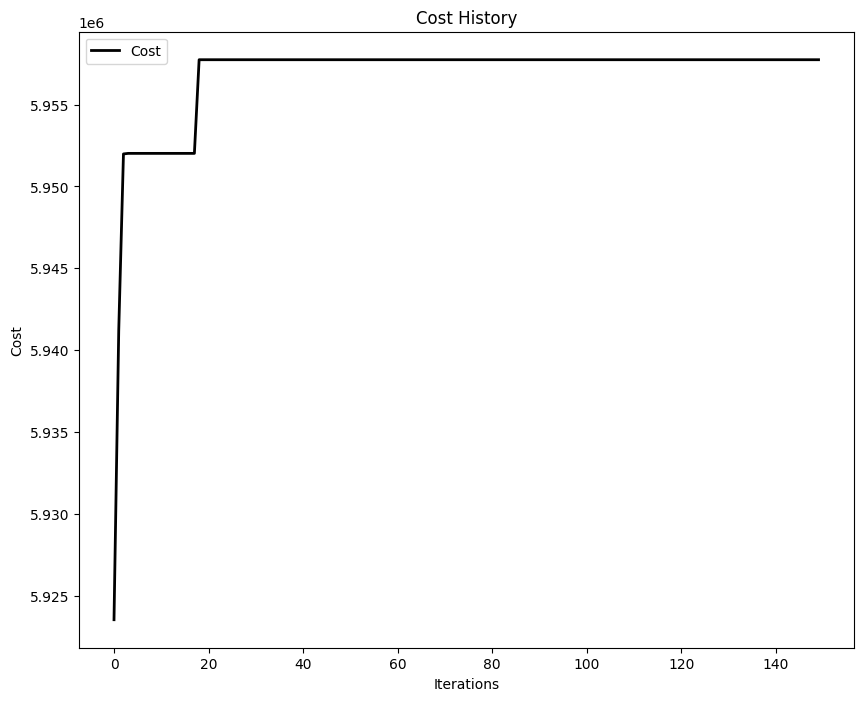

In [15]:
resultPSO.SaveResult(result)

In [10]:
# itNum = 100
# n_particles = 26
# options = {'c1': 0.20255337412386598,
#  'c2': 0.034812002156869526,
#  'w': 0.8707709059066462}
# today = '01.21.2024' #datetime.date.today().strftime("%m.%d.%Y")# 
# fileName = base_path + f'Pos Result {today}.csv' #today
# pos_df = pd.read_csv(fileName).drop('Unnamed: 0', axis = 1)
# inputWeights =np.tile(pos_df.pos.to_numpy(), [n_particles, 1])
# result = resultPSO.run_pso(options, n_particles=n_particles, itNum = itNum, init_pos=inputWeights)